In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from collections import Counter
import warnings

In [2]:
warnings.simplefilter(action="ignore")

In [3]:
# pd.set_option("display.max_rows", None)

In [4]:
df = pd.read_csv("D:\programming\Machine Learning\محمدرضا مؤمنی/Bank_Personal_Loan_Modelling.csv")

In [5]:
df

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  \
0        1   25           1      49     91107       4  1/60          1   
1        2   45          19      34     90089       3  1/50          1   
2        3   39          15      11     94720       1  1/00          1   
3        4   35           9     100     94112       1  2/70          2   
4        5   35           8      45     91330       4  1/00          2   
...    ...  ...         ...     ...       ...     ...   ...        ...   
4995  4996   29           3      40     92697       1  1/90          3   
4996  4997   30           4      15     92037       4  0/40          1   
4997  4998   63          39      24     93023       2  0/30          3   
4998  4999   65          40      49     90034       3  0/50          2   
4999  5000   28           4      83     92612       3  0/80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [6]:
# pd.set_option("display.max_rows")

In [7]:
df.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
df.columns.to_list()

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


<div style=" font-size:22px; line_height:160%">
The type of one of the columns is object.<br/>
In addition, column names should have underscore_score instead of space for better use and addressing<br/>


In [10]:
# تبدیل رشته‌های ستون با تایپ آبجکت به اعداد اعشاری 

list_CCAvg = []

for item in df.CCAvg.values:
    item = list(item)
    i = 0
    while i < len(item):
        if item[i] == "/":
            item[i] = "."
            item = float("".join(item))
            list_CCAvg.append(item)
            break
        i += 1


df["CCAvg"] = list_CCAvg
# df["CCAvg"] = pd.dfFrame({"CCAvg": list_CCAvg})

In [11]:
# تبدیل فاصله (اسپیس) بین نام ستون‌ها به آندراسکور ــ

df.columns = df.columns.str.replace(' ', '_')

In [12]:
df

ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<div style=" font-size:22px; line_height:160%">
The above information shows that we do not have missing values.

In [14]:
df.describe()

ID          Age   Experience       Income      ZIP_Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

<div style=" font-size:22px; line_height:160%">
In the experience feature, we have a negative number, which is very irrational. We will fix it in the future.

In [15]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP_Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

<div style=" font-size:22px; line_height:160%">
In analysis and prediction, it is practically meaningless to use the ID column of persons.<br/>
So we delete it from the dataset.

In [16]:
df = df.drop("ID", axis=1)

In [17]:
# Define a function to draw a dot plot

def one_scatter(df_name, x_ax_name, y_ax_name):
    scatter_name = f"{y_ax_name}-{x_ax_name}"
    fig_output_name = scatter_name
    plt.figure(figsize=(10,4), dpi=80)
    plt.title(f"{x_ax_name} - {y_ax_name}\n", fontsize=30 )
    scatter_name = plt.scatter(df_name[x_ax_name], df_name[y_ax_name])
    scatter_name.axes.tick_params(gridOn=True, size=12, labelsize=10)
    plt.xlabel(f"\n{x_ax_name}", fontsize=20)
    plt.ylabel(f"{y_ax_name}\n", fontsize=20)
    plt.xticks(rotation=90)

In [18]:
# Definition of the function to plot the count of the number of categories of each feature.

def count_plot(df_name, column_name):

    plt.figure(figsize=(20, 5), dpi=90)
    ax = sns.countplot(x=column_name, data=df)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(f"\n{column_name}", fontsize=20)
    plt.ylabel("count",fontsize=20)
    plt.title(f"Count of {column_name}", fontsize=30)
    plt.grid()

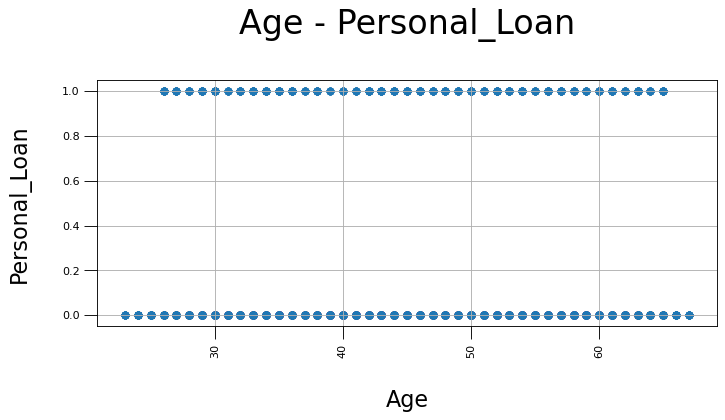

In [19]:
one_scatter(df, df.columns[0], df.columns[8])

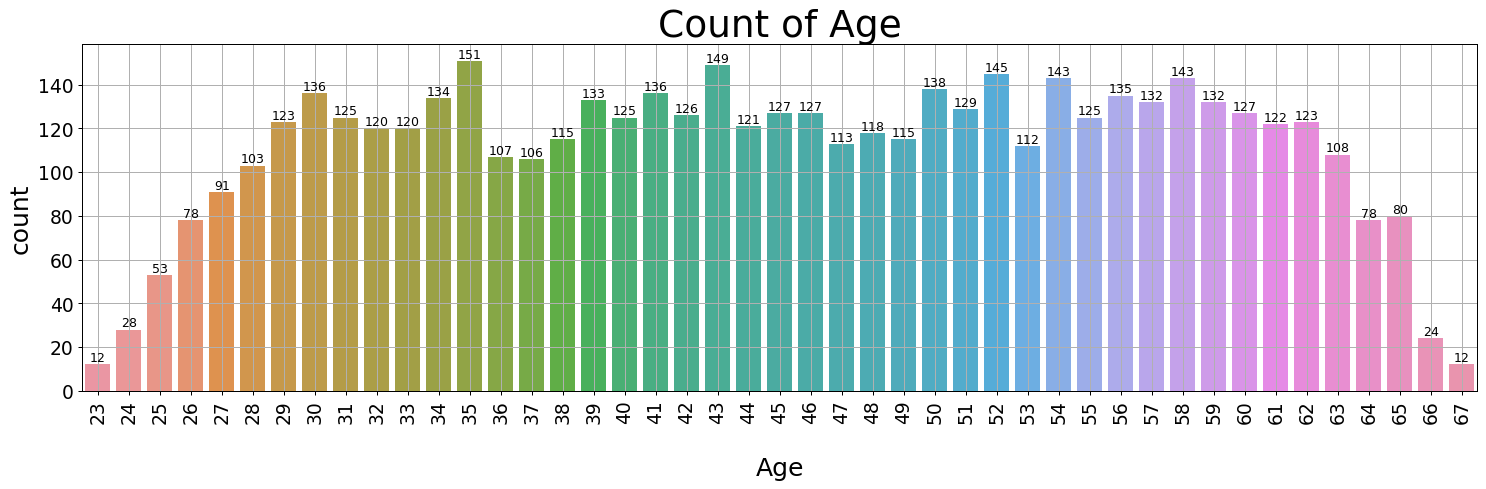

In [20]:
count_plot(df, df.columns[0])

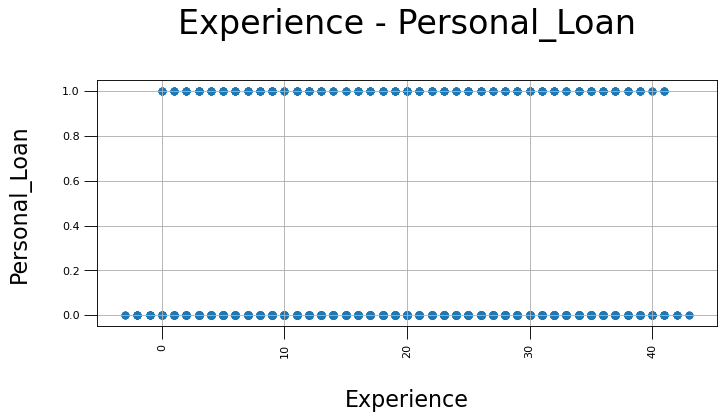

In [21]:
one_scatter(df, df.columns[1], df.columns[8])

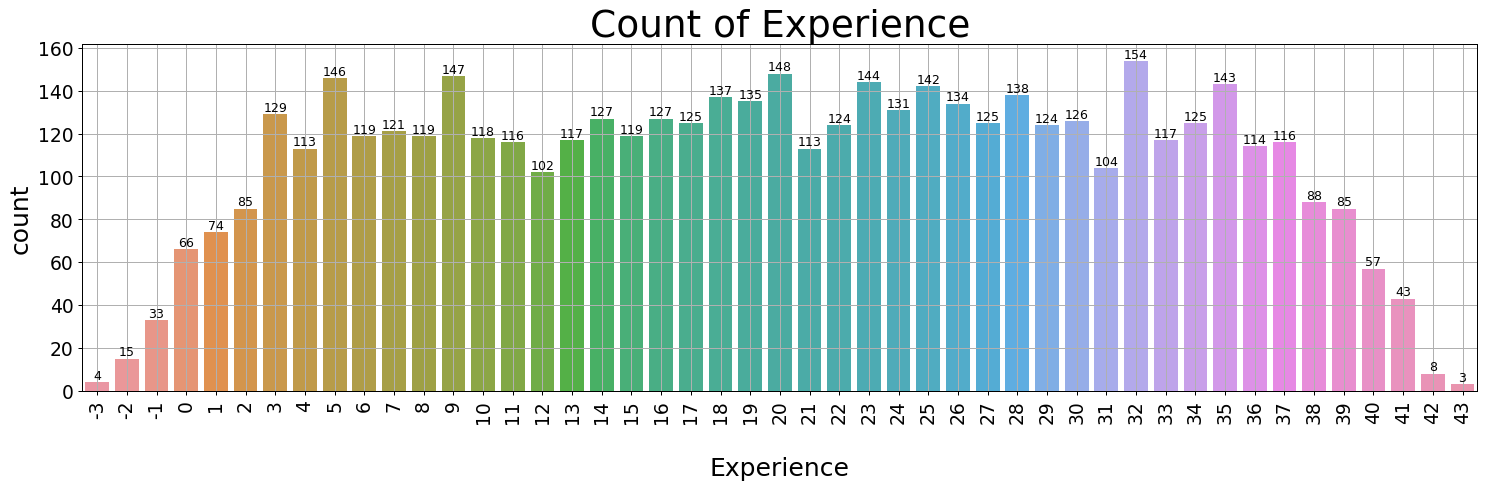

In [22]:
count_plot(df, df.columns[1])

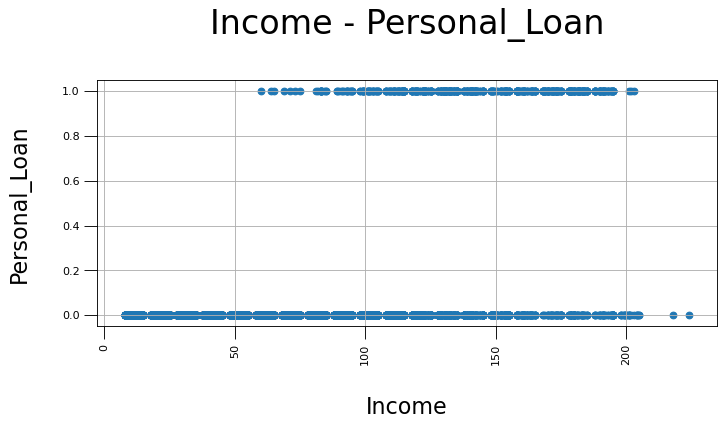

In [23]:
one_scatter(df, df.columns[2], df.columns[8])

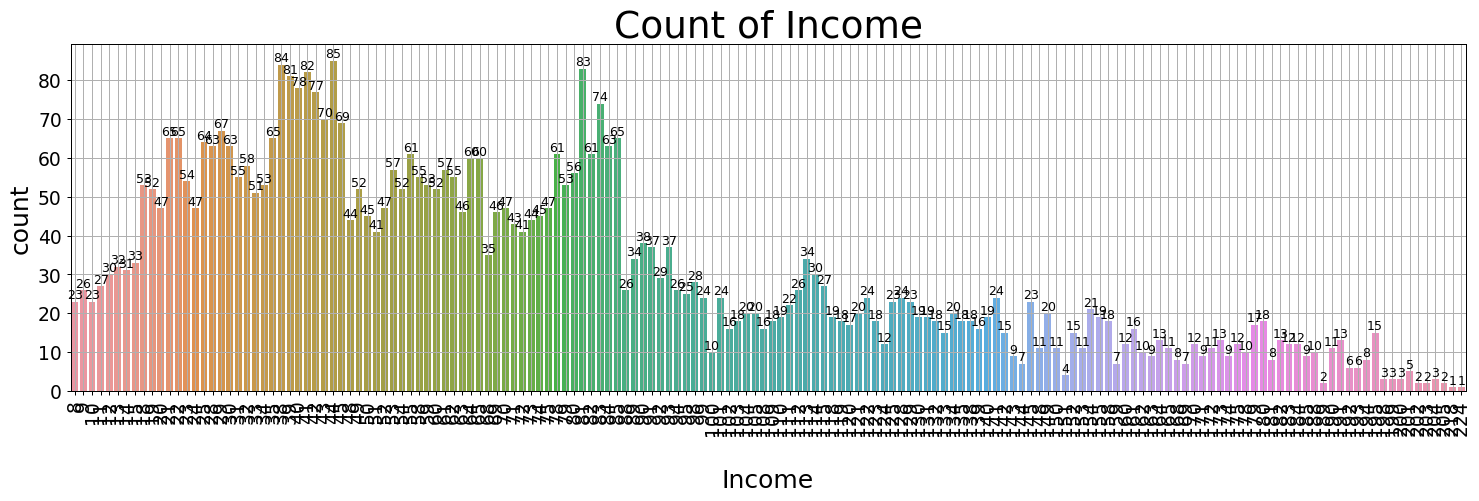

In [24]:
count_plot(df, df.columns[2])

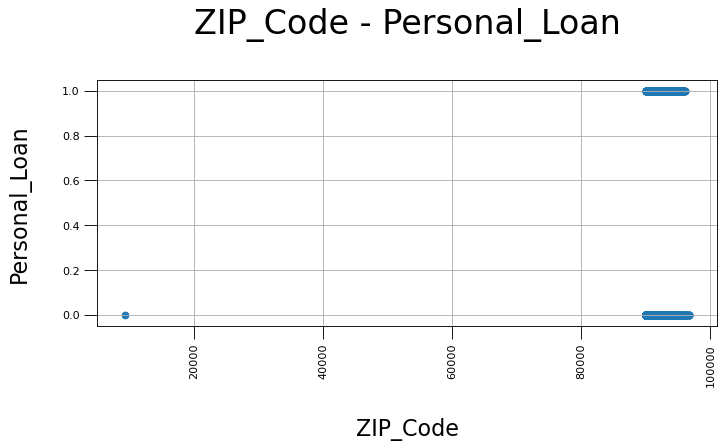

In [25]:
one_scatter(df, df.columns[3], df.columns[8])

In [26]:
df.sort_values(by="ZIP_Code")

Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
384    51          25      21      9307       4   0.60          3         0   
652    34           9      92     90005       1   2.80          1         0   
1619   45          21      29     90005       1   0.30          3         0   
1681   32           8     141     90005       2   4.33          1         0   
4186   33           9      10     90005       4   1.00          1        81   
...   ...         ...     ...       ...     ...    ...        ...       ...   
3525   59          34      13     96651       4   0.90          2         0   
1426   37          11      60     96651       3   0.50          3         0   
2731   29           5      28     96651       1   0.20          3         0   
672    51          27      23     96651       1   0.20          1         0   
1653   26           1      24     96651       2   0.90          3       123   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
384               0                   0           0       1           1  
652               0                   0           0       1           0  
1619              0                   0           0       1           0  
1681              0                   0           0       0           0  
4186              0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
3525              0                   0           0       0           0  
1426              0                   0           0       1           0  
2731              0                   0           0       1           0  
672               0                   0           0       1           0  
1653              0                   0           0       0           1  

[5000 rows x 13 columns]

In [27]:
# We delete that one outlier data

In [28]:
df = df[df["ZIP_Code"]>10000]

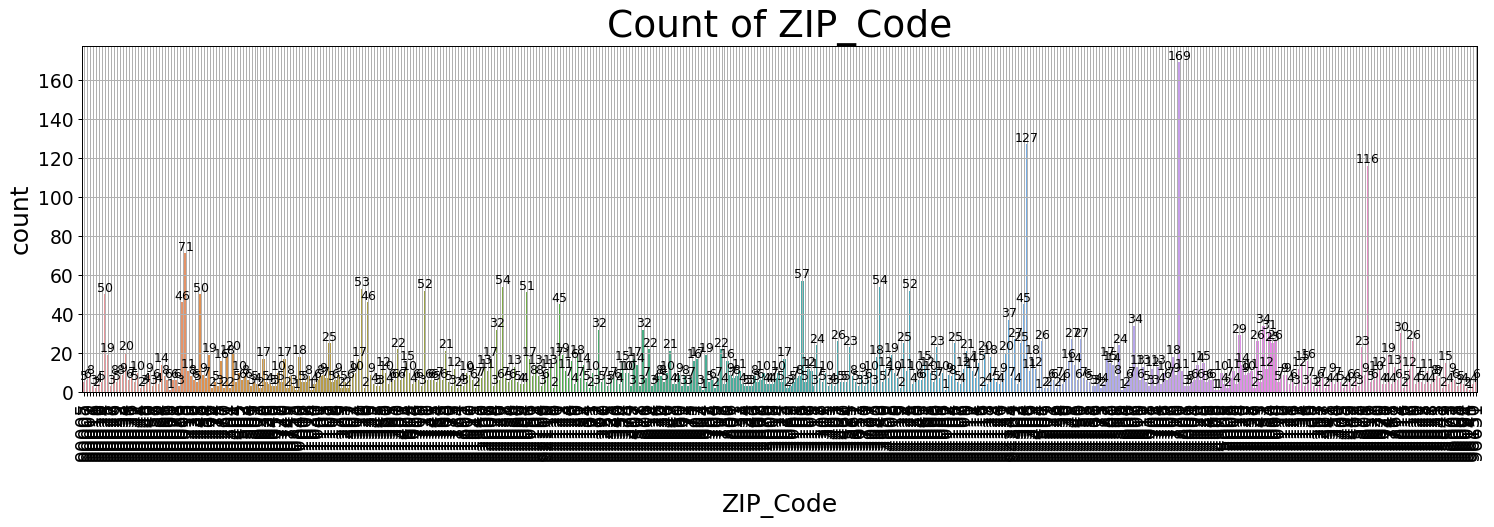

In [29]:
count_plot(df, df.columns[3])

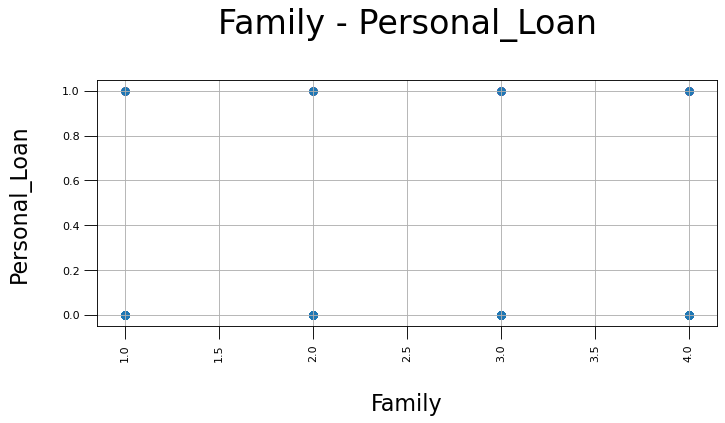

In [30]:
one_scatter(df, df.columns[4], df.columns[8])

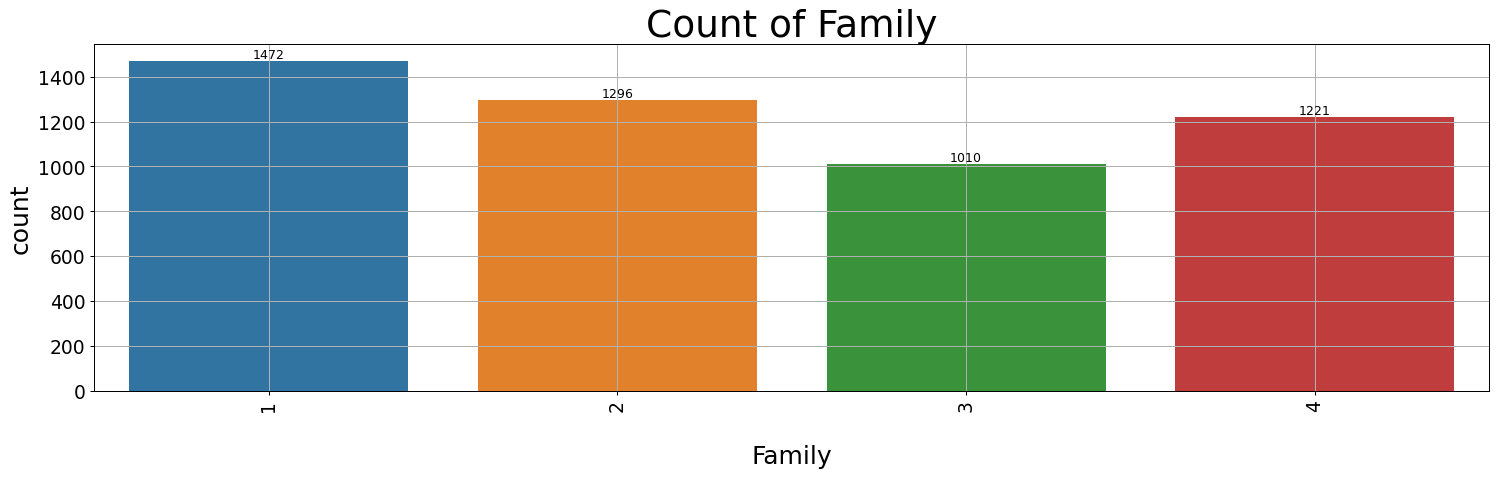

In [31]:
count_plot(df, df.columns[4])

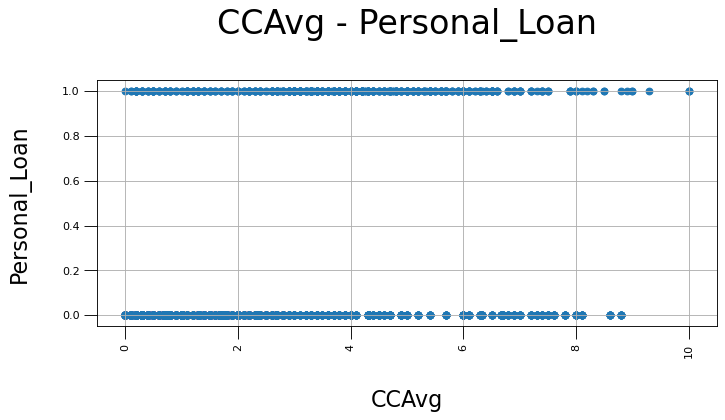

In [32]:
one_scatter(df, df.columns[5], df.columns[8])

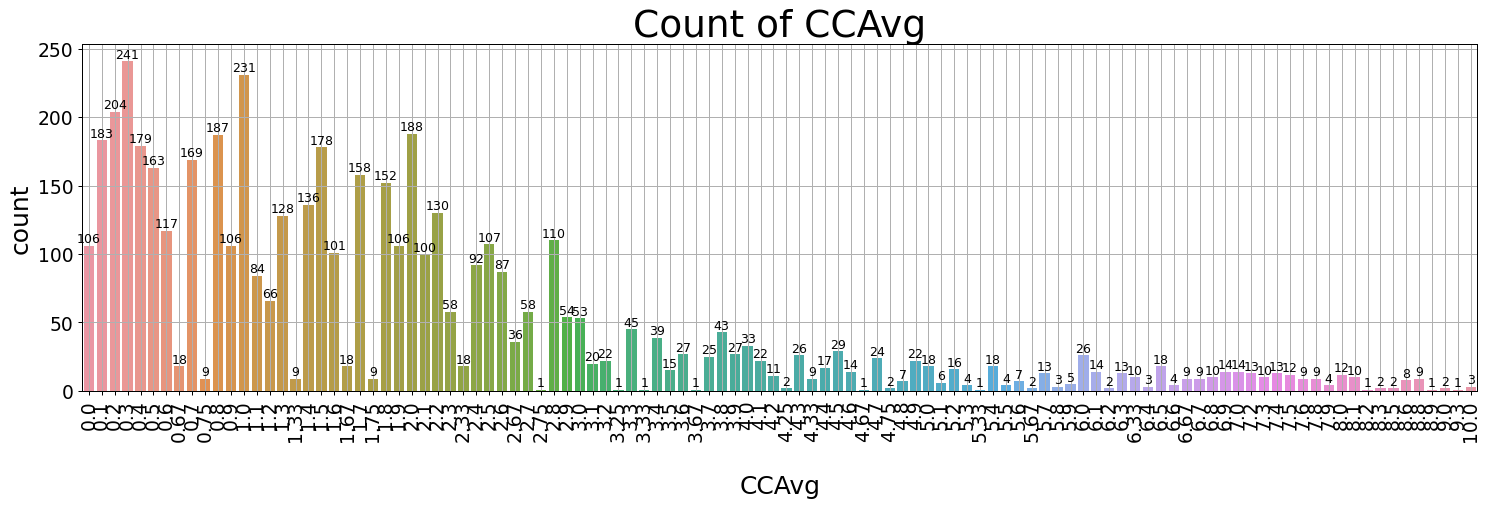

In [33]:
count_plot(df, df.columns[5])

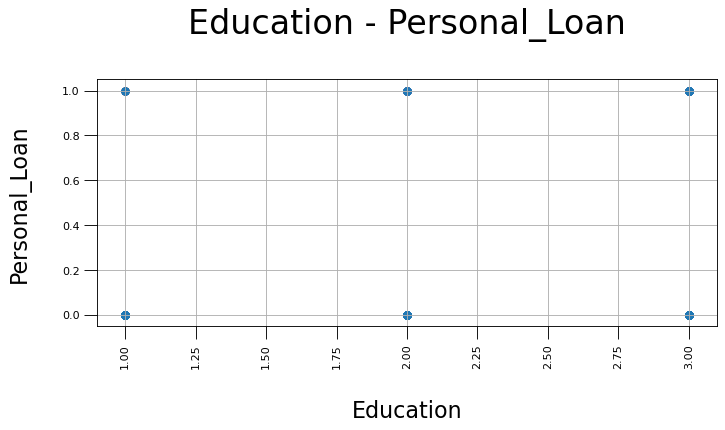

In [34]:
one_scatter(df, df.columns[6], df.columns[8])

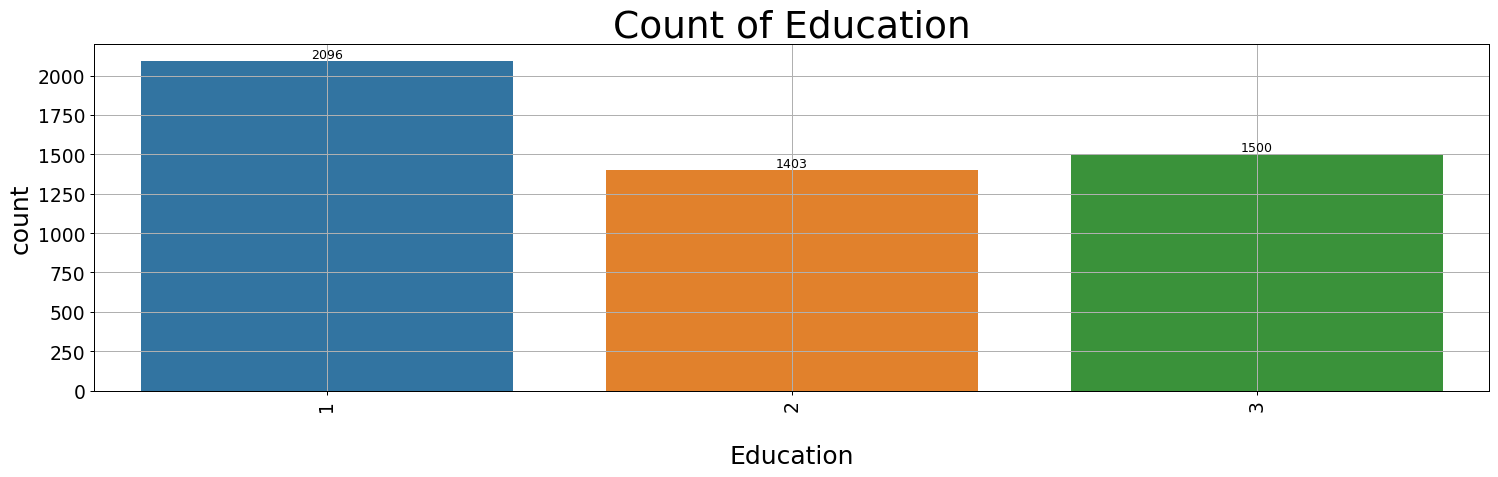

In [35]:
count_plot(df, df.columns[6])

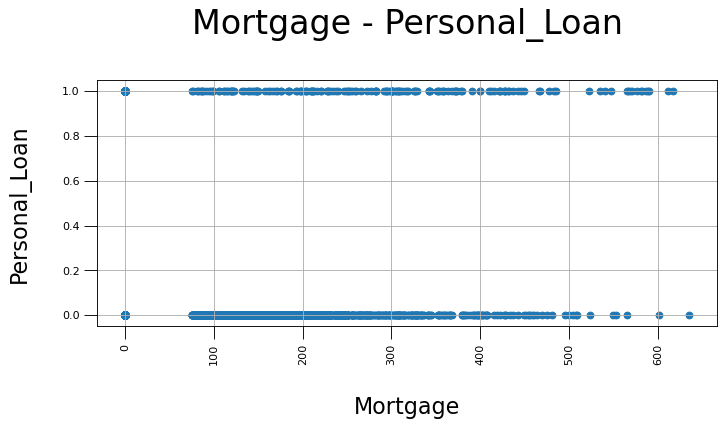

In [36]:
one_scatter(df, df.columns[7], df.columns[8])

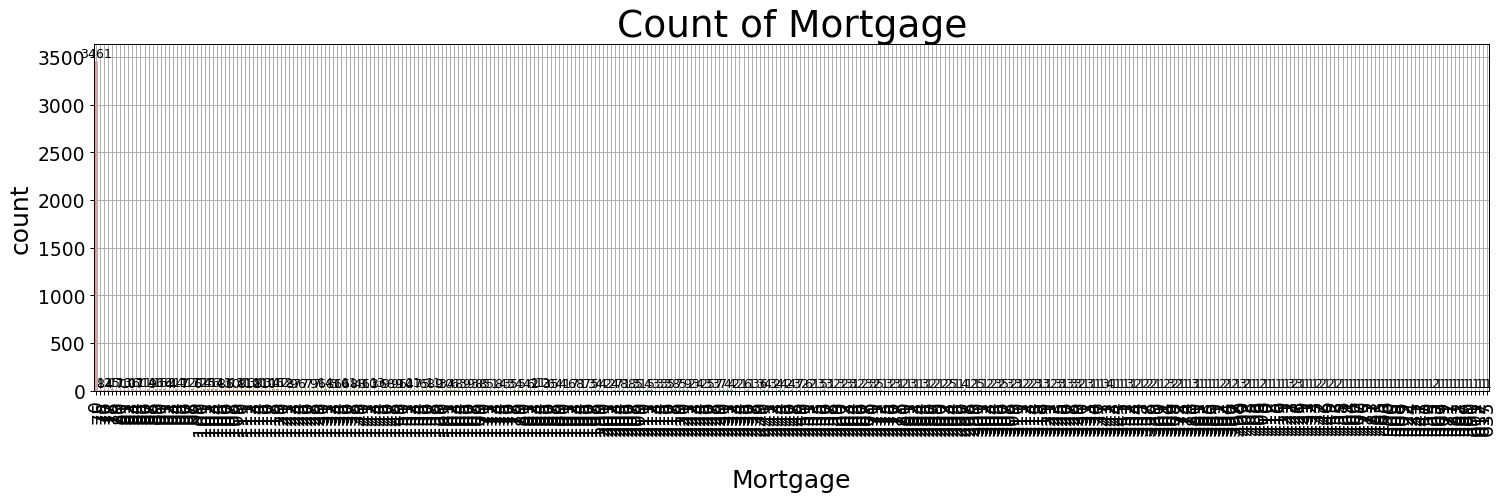

In [37]:
count_plot(df, df.columns[7])

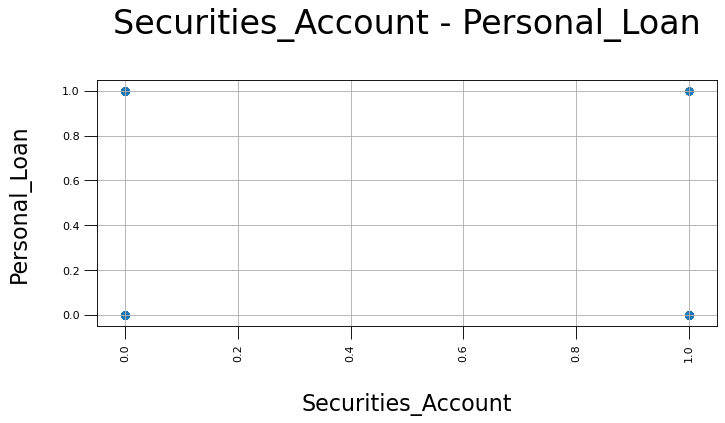

In [38]:
one_scatter(df, df.columns[9], df.columns[8])

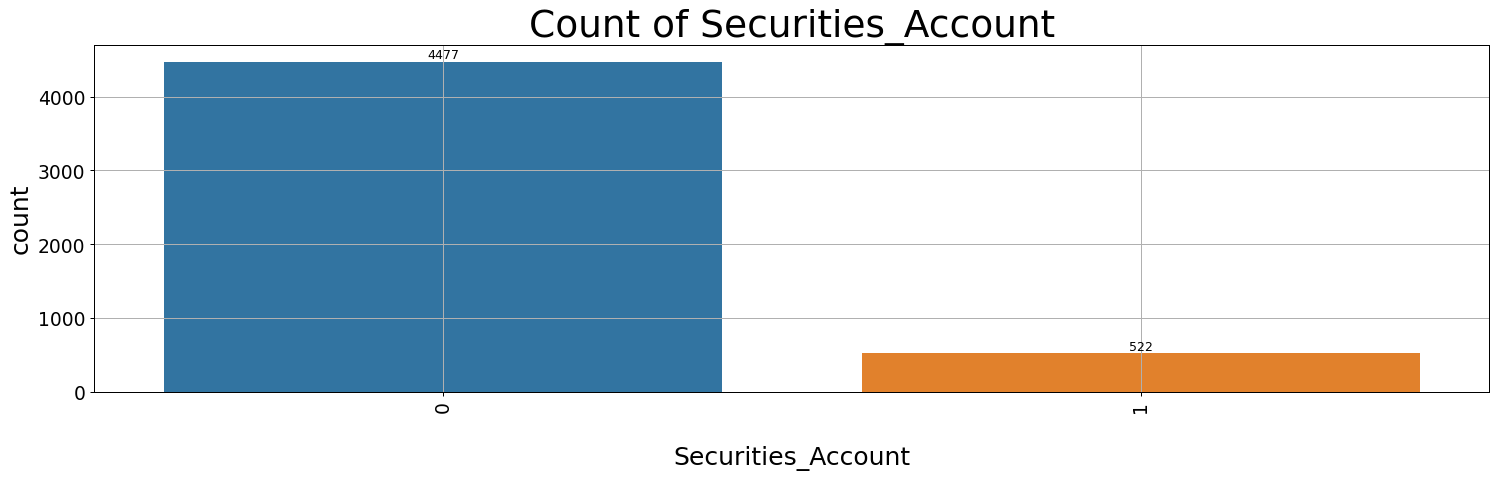

In [39]:
count_plot(df, df.columns[9])

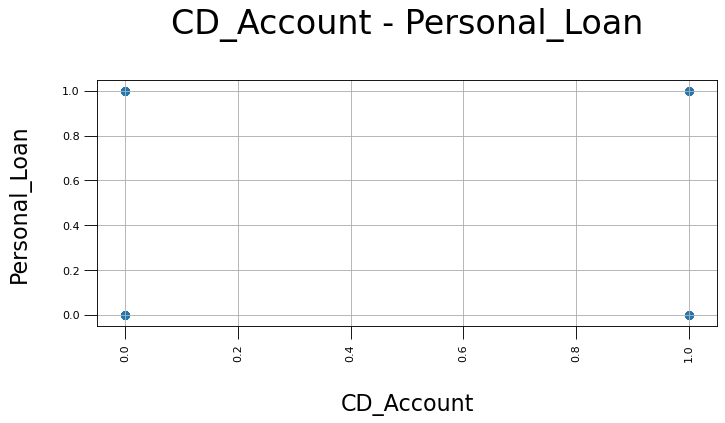

In [40]:
one_scatter(df, df.columns[10], df.columns[8])

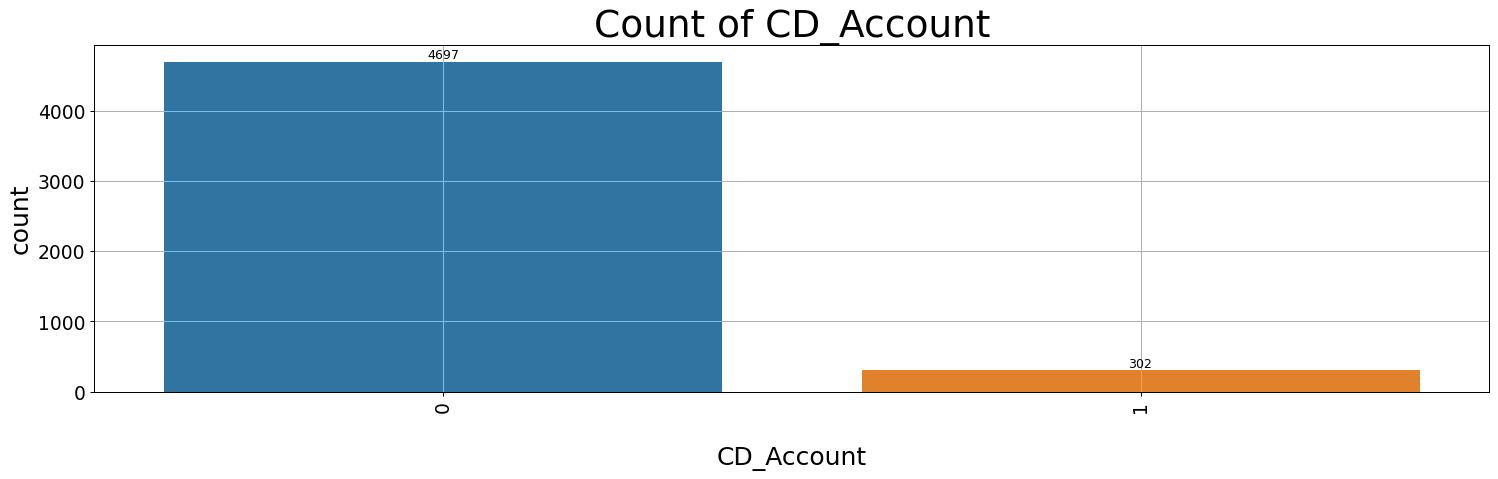

In [41]:
count_plot(df, df.columns[10])

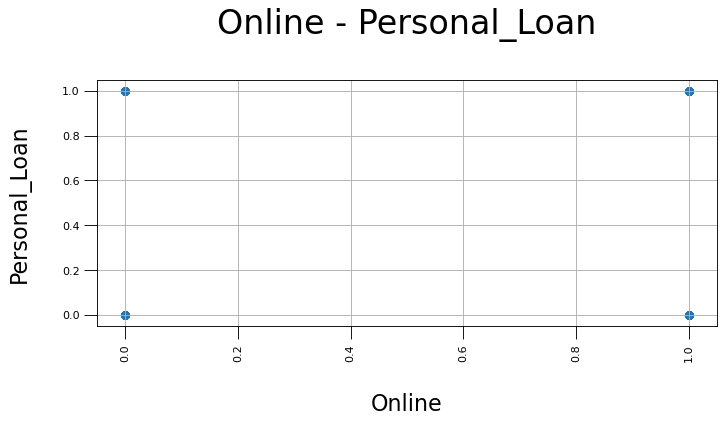

In [42]:
one_scatter(df, df.columns[11], df.columns[8])

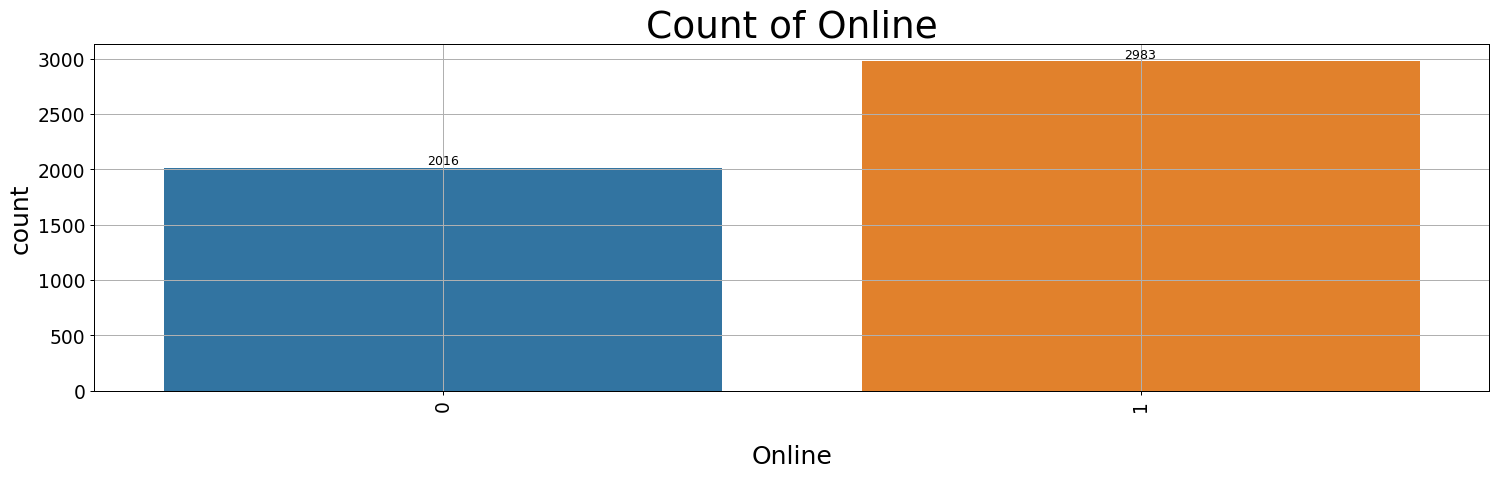

In [43]:
count_plot(df, df.columns[11])

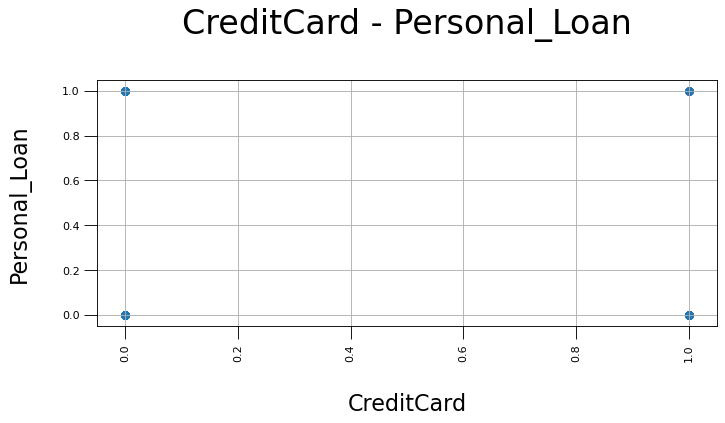

In [44]:
one_scatter(df, df.columns[12], df.columns[8])

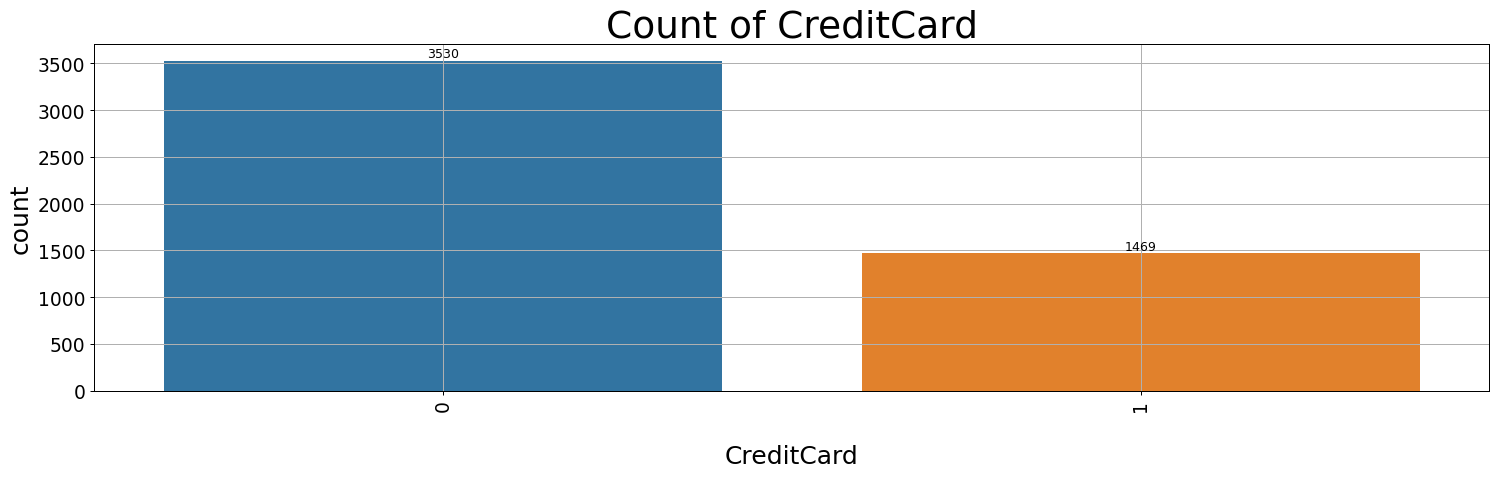

In [45]:
count_plot(df, df.columns[12])

<div style=" font-size:22px; line_height:160%">
Obtaining the percentage of negative values in the experience feature compared to the total data:

In [46]:
df_negatives = df[df.Experience<0]
df_negatives

Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
89     25          -1     113     94303       4   2.30          3         0   
226    24          -1      39     94085       2   1.70          2         0   
315    24          -2      51     90630       3   0.30          3         0   
451    28          -2      48     94132       2   1.75          3        89   
524    24          -1      75     93014       4   0.20          1         0   
536    25          -1      43     92173       3   2.40          2       176   
540    25          -1     109     94010       4   2.30          3       314   
576    25          -1      48     92870       3   0.30          3         0   
583    24          -1      38     95045       2   1.70          2         0   
597    24          -2     125     92835       2   7.20          1         0   
649    25          -1      82     92677       4   2.10          3         0   
670    23          -1      61     92374       4   2.60          1       239   
686    24          -1      38     92612       4   0.60          2         0   
793    24          -2     150     94720       2   2.00          1         0   
889    24          -2      82     91103       2   1.60          3         0   
909    23          -1     149     91709       1   6.33          1       305   
1173   24          -1      35     94305       2   1.70          2         0   
1428   25          -1      21     94583       4   0.40          1        90   
1522   25          -1     101     94720       4   2.30          3       256   
1905   25          -1     112     92507       2   2.00          1       241   
2102   25          -1      81     92647       2   1.60          3         0   
2430   23          -1      73     92120       4   2.60          1         0   
2466   24          -2      80     94105       2   1.60          3         0   
2545   25          -1      39     94720       3   2.40          2         0   
2618   23          -3      55     92704       3   2.40          2       145   
2717   23          -2      45     95422       4   0.60          2         0   
2848   24          -1      78     94720       2   1.80          2         0   
2876   24          -2      80     91107       2   1.60          3       238   
2962   23          -2      81     91711       2   1.80          2         0   
2980   25          -1      53     94305       3   2.40          2         0   
3076   29          -1      62     92672       2   1.75          3         0   
3130   23          -2      82     92152       2   1.80          2         0   
3157   23          -1      13     94720       4   1.00          1        84   
3279   26          -1      44     94901       1   2.00          2         0   
3284   25          -1     101     95819       4   2.10          3         0   
3292   25          -1      13     95616       4   0.40          1         0   
3394   25          -1     113     90089       4   2.10          3         0   
3425   23          -1      12     91605       4   1.00          1        90   
3626   24          -3      28     90089       4   1.00          3         0   
3796   24          -2      50     94920       3   2.40          2         0   
3824   23          -1      12     95064       4   1.00          1         0   
3887   24          -2     118     92634       2   7.20          1         0   
3946   25          -1      40     93117       3   2.40          2         0   
4015   25          -1     139     93106       2   2.00          1         0   
4088   29          -1      71     94801       2   1.75          3         0   
4116   24          -2     135     90065       2   7.20          1         0   
4285   23          -3     149     93555       2   7.20          1         0   
4411   23          -2      75     90291       2   1.80          2         0   
4481   25          -2      35     95045       4   1.00          3         0   
4514   24          -3      41     91768       4   1.00  

In [47]:
df_negatives_percent = (len(df_negatives)/len(df.Experience))*100
print(f"The percentage of negatives Experience is: %{round(df_negatives_percent, 3)} in {len(df.Experience)} samples.")

The percentage of negatives Experience is: %1.04 in 4999 samples.


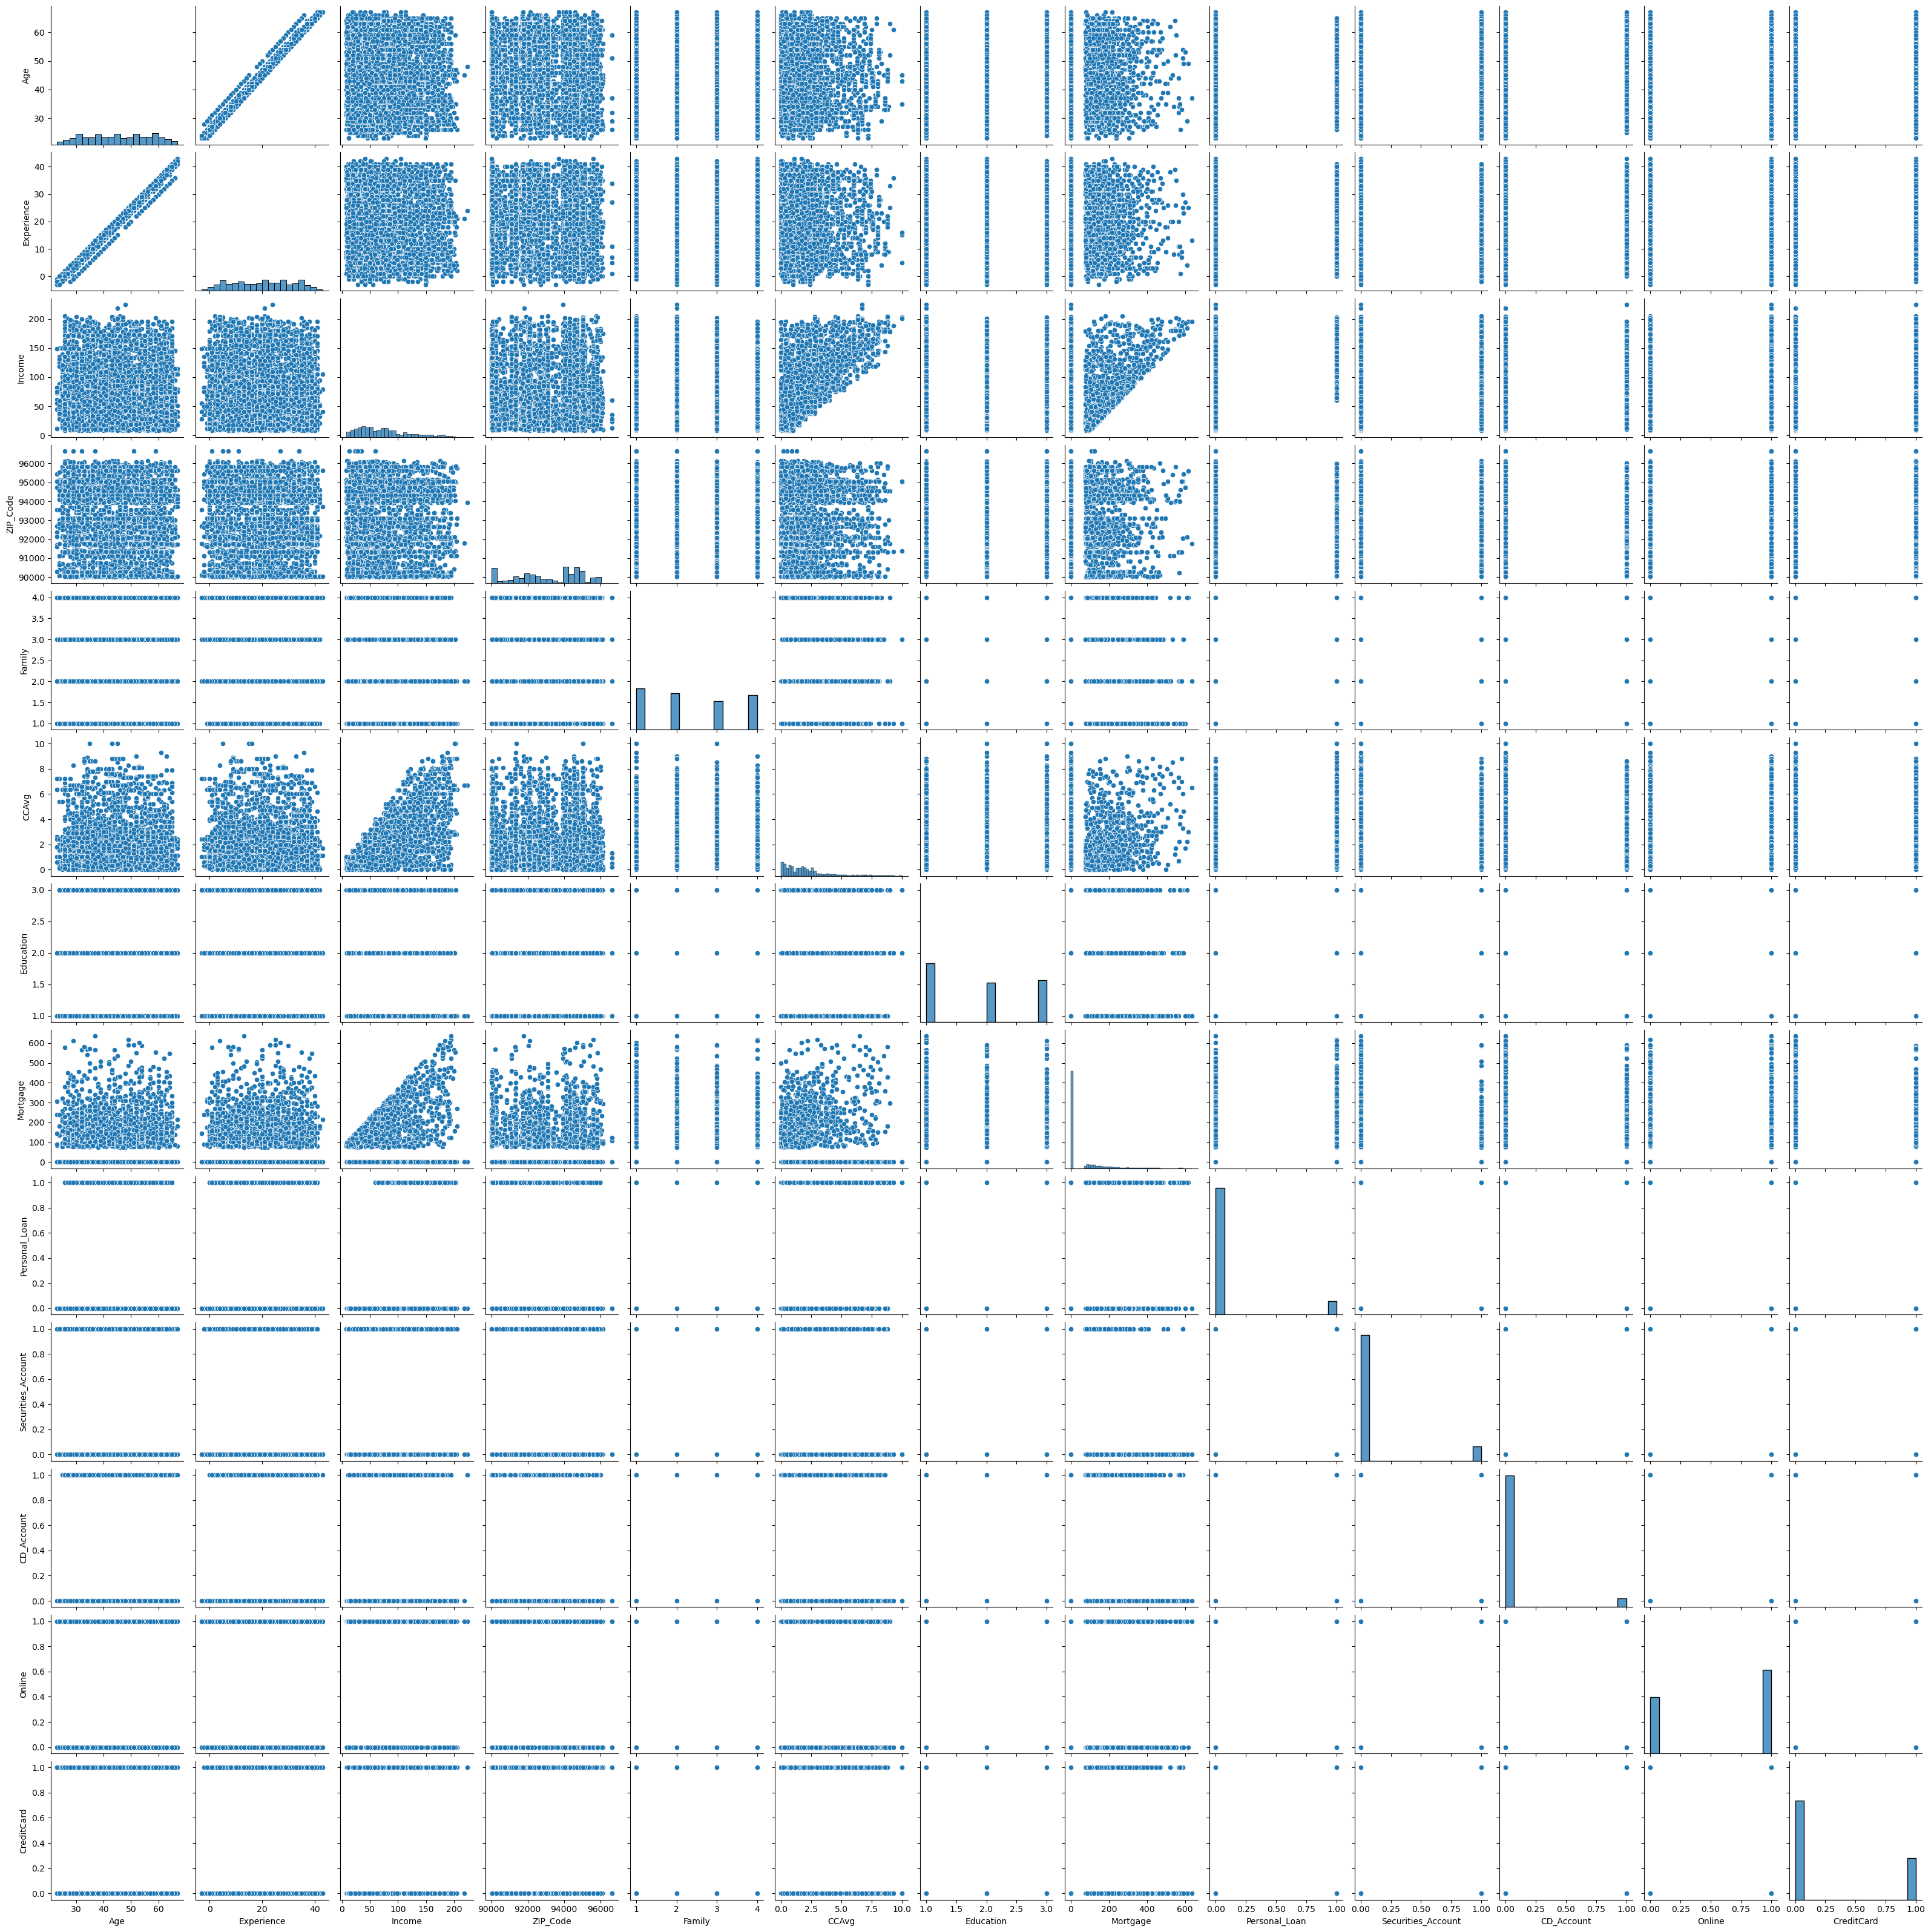

In [48]:
sns.pairplot(df)

In [49]:
df.corr()

Age  Experience    Income  ZIP_Code    Family  \
Age                 1.000000    0.994215 -0.055164 -0.030526 -0.046566   
Experience          0.994215    1.000000 -0.046483 -0.030452 -0.052694   
Income             -0.055164   -0.046483  1.000000 -0.030725 -0.157232   
ZIP_Code           -0.030526   -0.030452 -0.030725  1.000000  0.027532   
Family             -0.046566   -0.052694 -0.157232  0.027532  1.000000   
CCAvg              -0.051941   -0.050015  0.645931 -0.012197 -0.109088   
Education           0.041211    0.013041 -0.187277 -0.008254  0.064581   
Mortgage           -0.012484   -0.010535  0.206712  0.003608 -0.020294   
Personal_Loan      -0.007694   -0.007385  0.502459 -0.002977  0.061471   
Securities_Account -0.000403   -0.001203 -0.002695  0.002418  0.020094   
CD_Account          0.008068    0.010375  0.169703  0.021669  0.014184   
Online              0.013622    0.013829  0.014397  0.028328  0.010127   
CreditCard          0.007530    0.008837 -0.002030  0.024055  0.011160   

                       CCAvg  Education  Mortgage  Personal_Loan  \
Age                -0.051941   0.041211 -0.012484      -0.007694   
Experience         -0.050015   0.013041 -0.010535      -0.007385   
Income              0.645931  -0.187277  0.206712       0.502459   
ZIP_Code           -0.012197  -0.008254  0.003608      -0.002977   
Family             -0.109088   0.064581 -0.020294       0.061471   
CCAvg               1.000000  -0.135952  0.109829       0.366864   
Education          -0.135952   1.000000 -0.033186       0.136834   
Mortgage            0.109829  -0.033186  1.000000       0.142065   
Personal_Loan       0.366864   0.136834  0.142065       1.000000   
Securities_Account  0.015035  -0.010723 -0.005449       0.021932   
CD_Account          0.136504   0.014004  0.089286       0.316344   
Online             -0.003486  -0.015227 -0.005904       0.006332   
CreditCard         -0.006454  -0.011432 -0.007061       0.002903   

                    Securities_Account  CD_Account    Online  CreditCard  
Age                          -0.000403    0.008068  0.013622    0.007530  
Experience                   -0.001203    0.010375  0.013829    0.008837  
Income                       -0.002695    0.169703  0.014397   -0.002030  
ZIP_Code                      0.002418    0.021669  0.028328    0.024055  
Family                        0.020094    0.014184  0.010127    0.011160  
CCAvg                         0.015035    0.136504 -0.003486   -0.006454  
Education                    -0.010723    0.014004 -0.015227   -0.011432  
Mortgage                     -0.005449    0.089286 -0.005904   -0.007061  
Personal_Loan                 0.021932    0.316344  0.006332    0.002903  
Securities_Account            1.000000    0.317023  0.012685   -0.014926  
CD_Account                    0.317023    1.000000  0.175935    0.278792  
Online                        0.012685    0.175935  1.000000    0.003956  
CreditCard                   -0.014926    0.278792  0.003956    1.000000

In [50]:
df_corr = df.corr()
df_corr<0.5

Age  Experience  Income  ZIP_Code  Family  CCAvg  \
Age                 False       False    True      True    True   True   
Experience          False       False    True      True    True   True   
Income               True        True   False      True    True  False   
ZIP_Code             True        True    True     False    True   True   
Family               True        True    True      True   False   True   
CCAvg                True        True   False      True    True  False   
Education            True        True    True      True    True   True   
Mortgage             True        True    True      True    True   True   
Personal_Loan        True        True   False      True    True   True   
Securities_Account   True        True    True      True    True   True   
CD_Account           True        True    True      True    True   True   
Online               True        True    True      True    True   True   
CreditCard           True        True    True      True    True   True   

                    Education  Mortgage  Personal_Loan  Securities_Account  \
Age                      True      True           True                True   
Experience               True      True           True                True   
Income                   True      True          False                True   
ZIP_Code                 True      True           True                True   
Family                   True      True           True                True   
CCAvg                    True      True           True                True   
Education               False      True           True                True   
Mortgage                 True     False           True                True   
Personal_Loan            True      True          False                True   
Securities_Account       True      True           True               False   
CD_Account               True      True           True                True   
Online                   True      True           True                True   
CreditCard               True      True           True                True   

                    CD_Account  Online  CreditCard  
Age                       True    True        True  
Experience                True    True        True  
Income                    True    True        True  
ZIP_Code                  True    True        True  
Family                    True    True        True  
CCAvg                     True    True        True  
Education                 True    True        True  
Mortgage                  True    True        True  
Personal_Loan             True    True        True  
Securities_Account        True    True        True  
CD_Account               False    True        True  
Online                    True   False        True  
CreditCard                True    True       False

<div style=" font-size:22px; line_height:160%">
We see two correlations with a high value (higher than 0.5), which we plot their graphs to see what is going on.

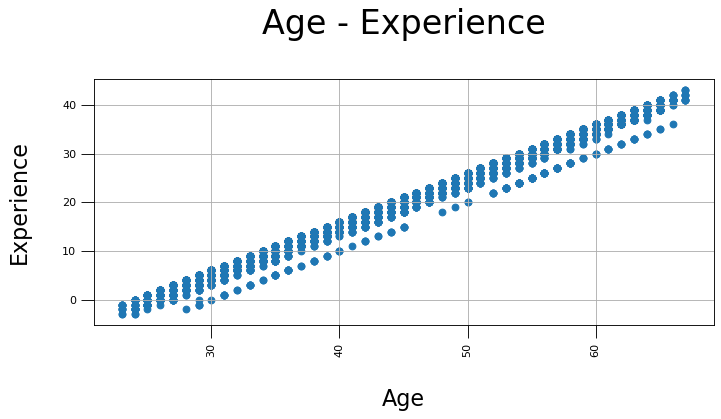

In [51]:
one_scatter(df, df.columns[0], df.columns[1])

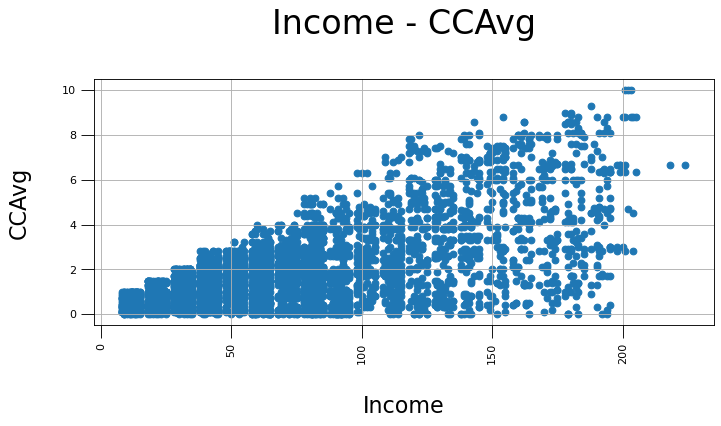

In [52]:
one_scatter(df, df.columns[2], df.columns[5])

<div style=" font-size:22px; line_height:160%">
The first correlation is very high (above 90%) and we will remove it later because we want to write the program once before and once after removing it.

<div style=" font-size:22px; line_height:160%">
We don't have a negative work history in reality!<br/>
So we have to think about them...<br/>
These data constitute one percent of the total data of the dataset.<br/>

<div style=" font-size:22px; line_height:160%">
The ways that can be investigated are:<br/>
1 zero placing them<br/>
2 removing them<br/>
3 replacing their values with their absolute values<br/>
4 replacing them with the average value of the total data<br/>
5. Due to the high correlation with the age feature, remove the work history feature altogether.<br/>

<div style=" font-size:22px; line_height:160%">
According to the data pattern and the way they are collected in the dataset, ways 3 and 4 do not seem logical.

<div style=" font-size:22px; line_height:160%">
Therefore, we write and compare the program for the other three modes:

In [53]:
# CASE 1: negative Experience values = 0

# CASE 2: negative Experience values -> eliminate (delete)

# CASE 3: the "Experience" column -> eliminate the column due to high correlation with "Age" column


<div style="font-size:30px; color:#33FF8A; line-height: 130%">
CASE 1:<br/>
    negative Experience values = 0

In [54]:
df1 = df.copy()

In [55]:
df1.loc[df1['Experience']<0, 'Experience'] = 0

In [56]:
df1.sort_values(by='Experience')

Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
2756   27           0      40     91301       4    1.0          3         0   
105    24           0      35     94704       3    0.1          2         0   
3292   25           0      13     95616       4    0.4          1         0   
1905   25           0     112     92507       2    2.0          1       241   
3378   25           0      44     94536       4    0.6          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
1480   67          42      32     93943       1    1.1          3         0   
465    66          42      35     94305       1    1.9          2       172   
2846   67          43     105     93711       4    1.7          2         0   
3886   67          43      79     95616       4    1.7          2       215   
4360   67          43      41     90024       2    1.1          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
2756              0                   0           0       1           0  
105               0                   1           0       1           0  
3292              0                   1           0       0           0  
1905              0                   0           0       1           0  
3378              0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
1480              0                   0           0       0           1  
465               0                   0           0       1           0  
2846              0                   0           0       1           0  
3886              0                   0           1       1           1  
4360              0                   0           0       0           0  

[4999 rows x 13 columns]

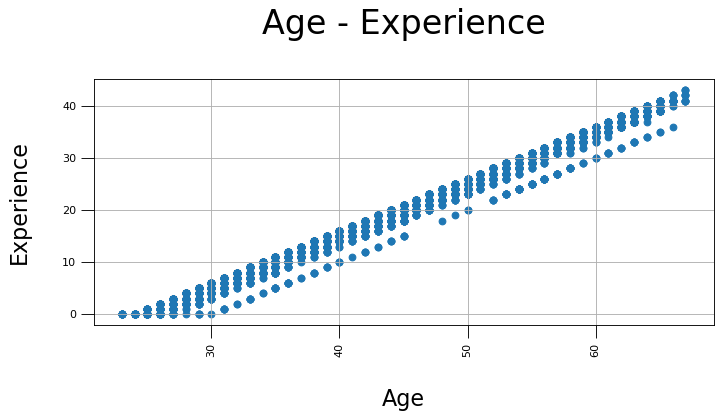

In [57]:
one_scatter(df1, df1.columns[0], df1.columns[1])

<div style="font-family:B Nazanin; font-size:30px; color:#33FF8A; line-height: 130%">
Logistic Regression (Case 1)

In [58]:
X = df1.drop("Personal_Loan", axis=1)
y = df1["Personal_Loan"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
logistic_reg = LogisticRegression(solver="liblinear")

In [61]:
logistic_reg.fit(X_train, y_train)
y_pred_lg = logistic_reg.predict(X_test)

In [62]:
y_pred_lg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
f1_score_lg_1 = metrics.f1_score(y_test, y_pred_lg)
print("Score (lg_1):", f1_score_lg_1)

Score (lg_1): 0.4052287581699347


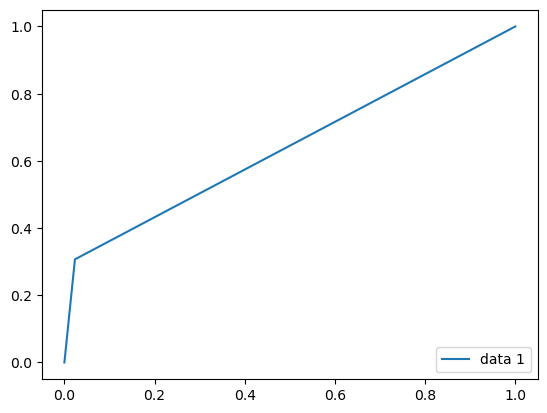

In [64]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_lg)
plt.plot(fpr, tpr, label="data 1")
plt.legend(loc=4)
plt.show()

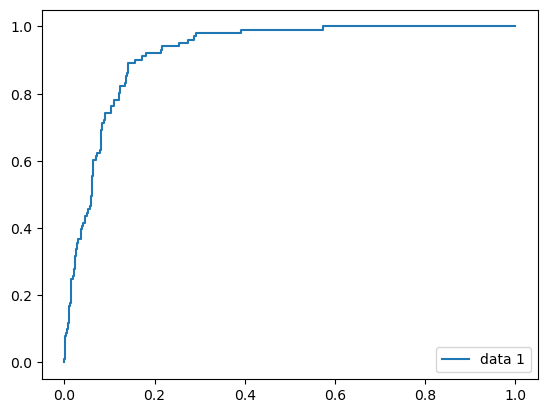

In [65]:
y_pred_proba_lg = logistic_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_lg)
plt.plot(fpr, tpr, label="data 1")
plt.legend(loc=4)
plt.show()

In [66]:
Counter(logistic_reg.predict(X))

Counter({0: 4723, 1: 276})

In [67]:
confusion_matrix(y, logistic_reg.predict(X))

array([[4393,  126],
       [ 330,  150]], dtype=int64)

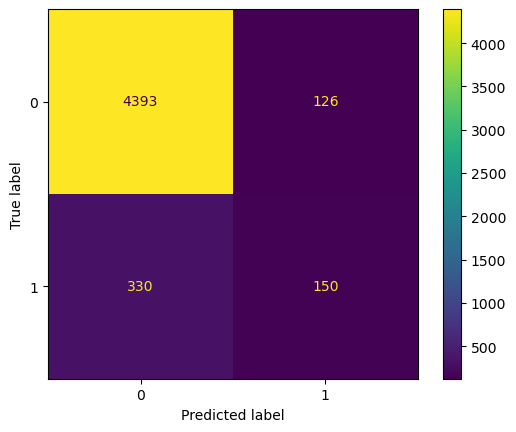

In [68]:
cm = confusion_matrix(y, logistic_reg.predict(X))

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

In [69]:
target_names = ['class 0', 'class 1']
print(classification_report(y, logistic_reg.predict(X), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.97      0.95      4519
     class 1       0.54      0.31      0.40       480

    accuracy                           0.91      4999
   macro avg       0.74      0.64      0.67      4999
weighted avg       0.89      0.91      0.90      4999



In [70]:
df_sample = pd.DataFrame({
    "Age": [42],
    "Experience": [16],
    "Income": [30],
    "ZIP_Code": [92037],
    "Family": [3],
    "CCAvg": [1.2],
    "Education": [3.0],
    "Mortgage": [0],
    "Securities_Account": [1],
    "CD_Account": [0],
    "Online": [1],
    "CreditCard": [1],
    "Personal_Loan": [1],
#     "ID": [5071]  # we don't need this feature for prediction
})

In [71]:
Df = pd.concat([df1, df_sample])
df_sample = Df.iloc[Df.shape[0]-1:]

df_sample

Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0   42          16      30     92037       3    1.2        3.0         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              1                   1           0       1           1

In [72]:
X_train = df1.drop("Personal_Loan", axis=1)
y_train = df1["Personal_Loan"]
X_test = df_sample.drop("Personal_Loan", axis=1)

In [73]:
logistic_reg.fit(X_train, y_train)
y_pred_1 = logistic_reg.predict(X_test)

In [74]:
print(y_pred_1)

[0]


In [75]:
# Cross Validation

In [76]:
for i in range(5, 11):
    kfold_validation = KFold(i, shuffle=True, random_state=0)
    results = cross_val_score(logistic_reg, X, y, cv=kfold_validation)
    results_mean = np.mean(results)
    print(f"For KFold = {i}:")
    print(f"results:\n{results}")
    print(f"mean results:\n{results_mean}")

For KFold = 5:
results:
[0.909      0.912      0.901      0.905      0.91491491]
mean results:
0.9083829829829831
For KFold = 6:
results:
[0.90527578 0.90996399 0.9027611  0.90636255 0.90876351 0.91596639]
mean results:
0.9081822177312172
For KFold = 7:
results:
[0.9020979  0.91036415 0.91036415 0.90196078 0.91316527 0.89915966
 0.91876751]
mean results:
0.9079827735289921
For KFold = 8:
results:
[0.9024     0.9088     0.9216     0.8944     0.912      0.9184
 0.888      0.92147436]
mean results:
0.9083842948717948
For KFold = 9:
results:
[0.90107914 0.9118705  0.91007194 0.90107914 0.90990991 0.9027027
 0.92792793 0.89189189 0.91711712]
mean results:
0.9081833632193343
For KFold = 10:
results:
[0.898      0.918      0.9        0.926      0.894      0.906
 0.916      0.896      0.918      0.91182365]
mean results:
0.908382364729459


<div style=" font-size:22px; line_height:160%">
The result of cross validation shows that in the dataset, we do not have data that have a significant negative effect on score.

<div style="font-family:B Nazanin; font-size:30px; color:#33FF8A; line-height: 130%">
ComplementNB (Case 1)

In [77]:
Counter(y)

Counter({0: 4519, 1: 480})

<div style=" font-size:22px; line_height:160%">
This indicates that the target data is imbalanced. Because the number of data 0 is much more than the number of data 1.<br/>
As a result, we use Naive Bayes Compliment.<br/>
Also, for this reason, the accuracy metric is not a good measure and we should consider other metrics or the confusion matrix.

In [78]:
X = df1.drop("Personal_Loan", axis=1)
y = df1["Personal_Loan"]#.values.reshape(-1, 1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
clf_NB = ComplementNB()

In [81]:
clf_NB.fit(X_train, y_train)

ComplementNB()

In [82]:
y_pred_NB = clf_NB.predict(X_test)

In [83]:
print(y_pred_NB)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 

In [84]:
f1_score_NB_1 = metrics.f1_score(y_test, y_pred_NB)
print("Score (NB_1):", f1_score_NB_1)

Score (NB_1): 0.33727810650887574


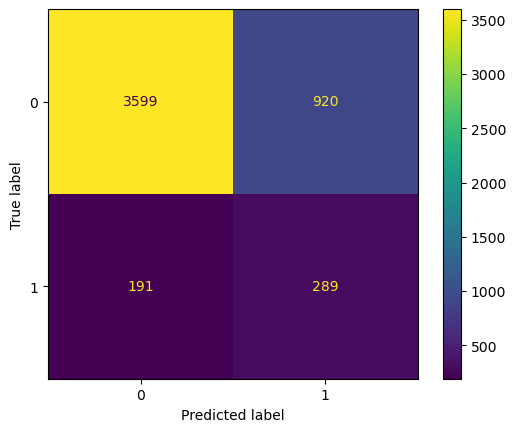

In [85]:
cm = confusion_matrix(y, clf_NB.predict(X))

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=clf_NB.classes_)
disp.plot()
plt.show()

In [86]:
target_names = ['class 0', 'class 1']
print(classification_report(y, clf_NB.predict(X), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.80      0.87      4519
     class 1       0.24      0.60      0.34       480

    accuracy                           0.78      4999
   macro avg       0.59      0.70      0.60      4999
weighted avg       0.88      0.78      0.82      4999



In [87]:
X_train = df1.drop("Personal_Loan", axis=1)
y_train = df1["Personal_Loan"]
X_test = df_sample.drop("Personal_Loan", axis=1)

In [88]:
clf_NB.fit(X_train, y_train)
y_pred_2 = clf_NB.predict(X_test)

In [89]:
print(y_pred_2)

[0]


<div style="font-family:B Nazanin; font-size:30px; color:#33FF8A; line-height: 130%">
KNN Algorithm (Case 1)

In [90]:
X = df1.drop("Personal_Loan", axis=1).values
y = df1["Personal_Loan"]#.values.reshape(-1, 1)


<div style=" font-size:22px; line_height:160%">
For X, we wrote a .values that has array mode instead of dataframe mode<br/>
Because in this case, the calculations are done at a higher speed, the amount of memory used is less, and the amount of CPU usage is less

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [92]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
# X_train_scaled = pd.DataFrame(X_train_scaling, columns=df.columns.drop("Personal_Loan"))
X_test_scaling = Scaler.transform(X_test)
# X_test_scaled = pd.DataFrame(X_test_scaling, columns=df.columns.drop("Personal_Loan"))

In [93]:
K = 20
Acc = np.zeros(K)
# print("Acc", Acc)

for i in range(1, K+1):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_scaling, y_train.ravel())
    y_pred = clf.predict(X_test_scaling)
    Acc[i-1] = metrics.f1_score(y_test, y_pred)
    
Acc

array([0.72189349, 0.56944444, 0.64102564, 0.58333333, 0.66666667,
       0.55319149, 0.61744966, 0.56944444, 0.62666667, 0.52173913,
       0.57342657, 0.51094891, 0.56338028, 0.54676259, 0.55319149,
       0.5323741 , 0.54285714, 0.47761194, 0.52173913, 0.45454545])

In [94]:
print(np.max(Acc))
print(np.min(Acc))

0.7218934911242604
0.4545454545454545


<div style=" font-size:22px; line_height:160%">
Finding the appropriate k for recall score

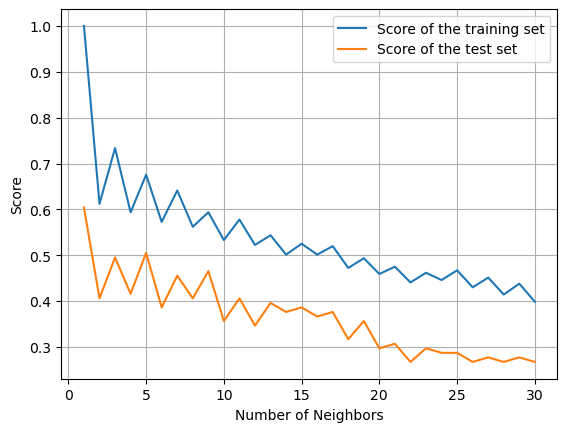

In [95]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaling, y_train.ravel())
    y_train_new = knn.predict(X_train_scaling)
    y_test_new = knn.predict(X_test_scaling)
    training_acc.append(metrics.recall_score(y_train, y_train_new))
    test_acc.append(metrics.recall_score(y_test, y_test_new))
    
plt.plot(neighbors_settings, training_acc, label="Score of the training set")
plt.plot(neighbors_settings, test_acc, label="Score of the test set")
plt.ylabel("Score")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.legend()

In [96]:
parameters = {"n_neighbors": range(1, 31)}
grid_kn = GridSearchCV(estimator=knn,  # Model
                      param_grid=parameters,  # Range of k
                      scoring="recall",  #Strategy to evaluate the performance
                      #of the cross-validated model on the test set
                      cv=5,  #cross-validation generator
                      verbose=1,  #Time to calculate
                      n_jobs=-1)  #Help to CPU

grid_kn.fit(X_train_scaling, y_train.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='recall',
             verbose=1)

In [97]:
grid_kn.best_params_

{'n_neighbors': 1}

In [98]:
K = 1
clf = KNeighborsClassifier(K)
clf.fit(X_train_scaling, y_train.ravel())
y_pred_KNN = clf.predict(X_test_scaling)

In [99]:
f1_score_KNN_1_recall = metrics.f1_score(y_test, y_pred_KNN)
print("Score (knn_1_recall):", f1_score_KNN_1_recall)

Score (knn_1_recall): 0.7218934911242604


In [100]:
X_train = df1.drop("Personal_Loan", axis=1).values
y_train = df1["Personal_Loan"]
X_test = df_sample.drop("Personal_Loan", axis=1).values

In [101]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
# X_train_scaled = pd.DataFrame(X_train_scaling, columns=df.columns.drop("Personal_Loan"))
X_test_scaling = Scaler.transform(X_test)
# X_test_scaled = pd.DataFrame(X_test_scaling, columns=df.columns.drop("Personal_Loan"))

In [102]:
clf.fit(X_train_scaling, y_train)
y_pred_3_1 = clf.predict(X_test_scaling)

In [103]:
print(y_pred_3_1)

[0]


<div style=" font-size:22px; line_height:160%">
Finding the right k for precision

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

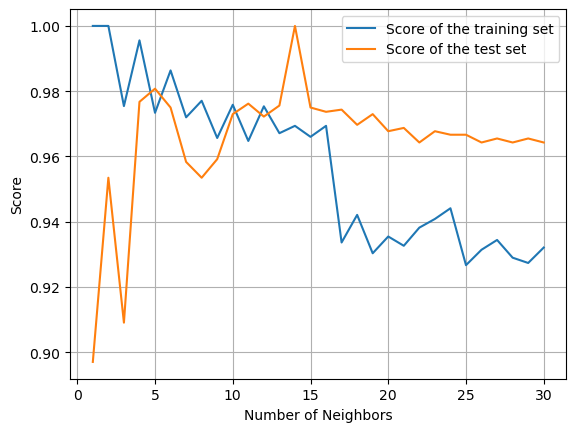

In [106]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaling, y_train.ravel())
    y_train_new = knn.predict(X_train_scaling)
    y_test_new = knn.predict(X_test_scaling)
    training_acc.append(metrics.precision_score(y_train, y_train_new))
    test_acc.append(metrics.precision_score(y_test, y_test_new))
    
plt.plot(neighbors_settings, training_acc, label="Score of the training set")
plt.plot(neighbors_settings, test_acc, label="Score of the test set")
plt.ylabel("Score")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.legend()

In [107]:
parameters = {"n_neighbors": range(1, 31)}
grid_kn = GridSearchCV(estimator=knn,  # Model
                      param_grid=parameters,  # Range of k
                      scoring="precision",  #Strategy to evaluate the performance
                      #of the cross-validated model on the test set
                      cv=5,  #cross-validation generator
                      verbose=1,  #Time to calculate
                      n_jobs=-1)  #Help to CPU

grid_kn.fit(X_train_scaling, y_train.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='precision',
             verbose=1)

In [108]:
grid_kn.best_params_

{'n_neighbors': 6}

In [109]:
K = 6
clf = KNeighborsClassifier(K)
clf.fit(X_train_scaling, y_train.ravel())
y_pred_KNN_1 = clf.predict(X_test_scaling)

In [110]:
f1_score_KNN_1_precision = metrics.f1_score(y_test, y_pred_KNN_1)
print("Score (knn_1_precision):", f1_score_KNN_1_precision)

Score (knn_1_precision): 0.5531914893617021


In [111]:
X_train = df1.drop("Personal_Loan", axis=1).values
y_train = df1["Personal_Loan"]
X_test = df_sample.drop("Personal_Loan", axis=1).values

In [112]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

In [113]:
clf.fit(X_train_scaling, y_train)
y_pred_3_2 = clf.predict(X_test_scaling)

In [114]:
print(y_pred_3_2)

[0]


<div style=" font-size:22px; line_height:160%">
Find the appropriate k for the score of f1

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [116]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

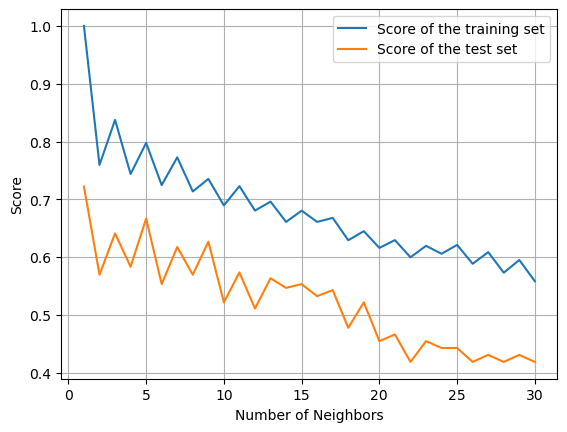

In [117]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaling, y_train.ravel())
    y_train_new = knn.predict(X_train_scaling)
    y_test_new = knn.predict(X_test_scaling)
    training_acc.append(metrics.f1_score(y_train, y_train_new))
    test_acc.append(metrics.f1_score(y_test, y_test_new))
    
plt.plot(neighbors_settings, training_acc, label="Score of the training set")
plt.plot(neighbors_settings, test_acc, label="Score of the test set")
plt.ylabel("Score")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.legend()

In [118]:
parameters = {"n_neighbors": range(1, 31)}
grid_kn = GridSearchCV(estimator=knn,  # Model
                      param_grid=parameters,  # Range of k
                      scoring="f1",  #Strategy to evaluate the performance
                      #of the cross-validated model on the test set
                      cv=5,  #cross-validation generator
                      verbose=1,  #Time to calculate
                      n_jobs=-1)  #Help to CPU

grid_kn.fit(X_train_scaling, y_train.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='f1', verbose=1)

In [119]:
grid_kn.best_params_

{'n_neighbors': 5}

In [120]:
K = 5
clf = KNeighborsClassifier(K)
clf.fit(X_train_scaling, y_train.ravel())
y_pred_KNN_1 = clf.predict(X_test_scaling)

In [121]:
f1_score_KNN_1_f1 = metrics.f1_score(y_test, y_pred_KNN_1)
print("Score (knn_1_f1):", f1_score_KNN_1_f1)

Score (knn_1_f1): 0.6666666666666666


In [122]:
X_train = df1.drop("Personal_Loan", axis=1).values
y_train = df1["Personal_Loan"]
X_test = df_sample.drop("Personal_Loan", axis=1).values

In [123]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

In [124]:
clf.fit(X_train_scaling, y_train)
y_pred_3_3 = clf.predict(X_test_scaling)

In [125]:
print(y_pred_3_3)

[0]


<div style="font-size:30px; color:#33FF8A; line-height: 130%">
CASE 2:<br/>
negative Experience values -> eliminate (delete)

In [126]:
df2 = df[df['Experience']>=0]
df2.sort_values(by='Experience')

Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
466    25           0      13     91342       2    0.9          3         0   
3075   26           0      85     95616       2    1.6          3         0   
2756   27           0      40     91301       4    1.0          3         0   
2652   24           0      44     90089       4    1.6          1       180   
2648   26           0     155     93105       2    7.2          1         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4172   67          42      75     90041       4    0.1          2       182   
734    66          42      53     92182       2    1.1          1         0   
3886   67          43      79     95616       4    1.7          2       215   
4360   67          43      41     90024       2    1.1          1         0   
2846   67          43     105     93711       4    1.7          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
466               0                   0           0       1           0  
3075              0                   0           0       0           0  
2756              0                   0           0       1           0  
2652              0                   0           0       1           0  
2648              0                   0           0       0           0  
...             ...                 ...         ...     ...         ...  
4172              0                   0           0       1           0  
734               0                   0           0       1           1  
3886              0                   0           1       1           1  
4360              0                   0           0       0           0  
2846              0                   0           0       1           0  

[4947 rows x 13 columns]

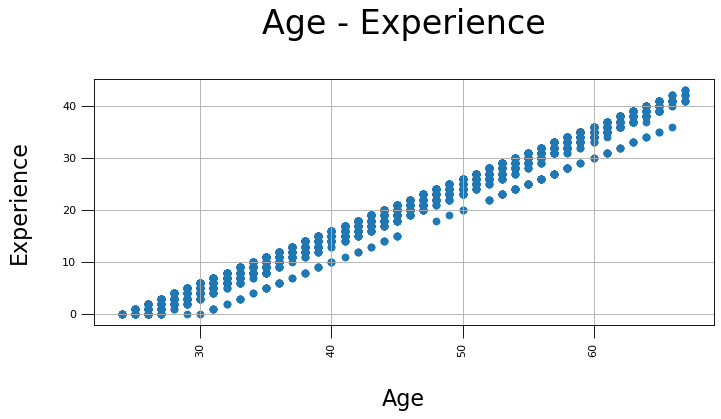

In [127]:
one_scatter(df2, df2.columns[0], df2.columns[1])

In [128]:
X = df2.drop("Personal_Loan", axis=1)
y = df2["Personal_Loan"]#.values.reshape(-1, 1)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<div style="font-family:B Nazanin; font-size:30px; color:#33FF8A; line-height: 130%">
Logistic Regression (Case 2)

In [130]:
logistic_reg = LogisticRegression(solver="liblinear")

In [131]:
logistic_reg.fit(X_train, y_train)
y_pred_lg = logistic_reg.predict(X_test)

In [132]:
y_pred_lg

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [133]:
f1_score_lg_2 = metrics.f1_score(y_test, y_pred_lg)
print("Score (lg_2):", f1_score_lg_2)

Score (lg_2): 0.42622950819672134


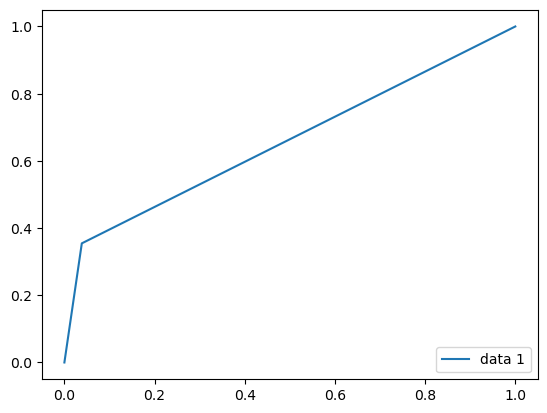

In [134]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_lg)
plt.plot(fpr, tpr, label="data 1")
plt.legend(loc=4)
plt.show()

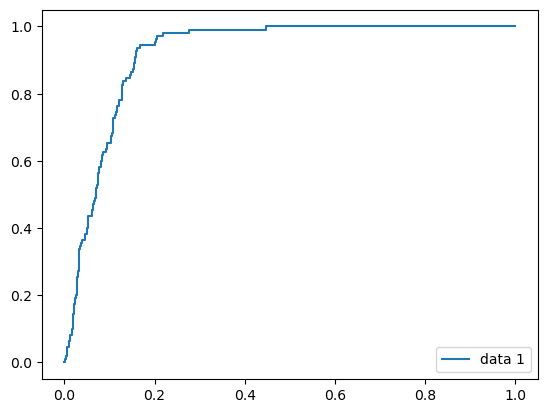

In [135]:
y_pred_proba_lg = logistic_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_lg)
plt.plot(fpr, tpr, label="data 1")
plt.legend(loc=4)
plt.show()

In [136]:
Counter(logistic_reg.predict(X))

Counter({0: 4656, 1: 291})

In [137]:
confusion_matrix(y, logistic_reg.predict(X))

array([[4332,  135],
       [ 324,  156]], dtype=int64)

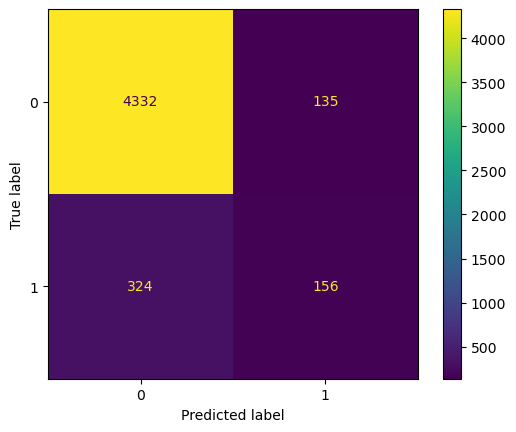

In [138]:
cm = confusion_matrix(y, logistic_reg.predict(X))

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

In [139]:
target_names = ['class 0', 'class 1']
print(classification_report(y, logistic_reg.predict(X), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.97      0.95      4467
     class 1       0.54      0.33      0.40       480

    accuracy                           0.91      4947
   macro avg       0.73      0.65      0.68      4947
weighted avg       0.89      0.91      0.90      4947



In [140]:
# Cross Validation

In [141]:
for i in range(5, 11):
    kfold_validation = KFold(i, shuffle=True, random_state=0)
    results = cross_val_score(logistic_reg, X, y, cv=kfold_validation)
    print(f"For KFold = {i}:")
    print(f"{results}\n")

For KFold = 5:
[0.89393939 0.9030303  0.9049545  0.91506572 0.91304348]

For KFold = 6:
[0.88969697 0.9030303  0.91393939 0.91019417 0.91383495 0.91383495]

For KFold = 7:
[0.88967468 0.91089109 0.90523338 0.9009901  0.90947666 0.92634561
 0.91076487]

For KFold = 8:
[0.88852989 0.91599354 0.88691438 0.91423948 0.90614887 0.90614887
 0.92880259 0.90776699]

For KFold = 9:
[0.89090909 0.90727273 0.9        0.91454545 0.89272727 0.92363636
 0.90528233 0.93078324 0.90528233]

For KFold = 10:
[0.89090909 0.8989899  0.91313131 0.8969697  0.90909091 0.8989899
 0.91919192 0.91700405 0.91700405 0.91093117]



<div style=" font-size:22px; line_height:160%">
The result of cross validation shows that in the dataset, we do not have data that have a significant negative effect on score.

In [142]:
df_sample = pd.DataFrame({
    "Age": [42],
    "Experience": [16],
    "Income": [30],
    "ZIP_Code": [92037],
    "Family": [3],
    "CCAvg": [1.2],
    "Education": [3.0],
    "Mortgage": [0],
    "Securities_Account": [1],
    "CD_Account": [0],
    "Online": [1],
    "CreditCard": [1],
    "Personal_Loan": [1],
#     "ID": [5071]
})

In [143]:
Df = pd.concat([df2, df_sample])
df_sample = Df.iloc[Df.shape[0]-1:]

df_sample

Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0   42          16      30     92037       3    1.2        3.0         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              1                   1           0       1           1

In [144]:
X_train = df2.drop("Personal_Loan", axis=1)
y_train = df2["Personal_Loan"]
X_test = df_sample.drop("Personal_Loan", axis=1)

In [145]:
logistic_reg.fit(X_train, y_train)
y_pred_1 = logistic_reg.predict(X_test)

In [146]:
print(y_pred_1)

[0]


<div style="font-family:B Nazanin; font-size:30px; color:#33FF8A; line-height: 130%">
ComplementNB (Case 2)

In [147]:
Counter(y)

Counter({0: 4467, 1: 480})

<div style=" font-size:22px; line_height:160%">
This indicates that the target data is imbalanced.<br/>
As a result, we use Naive Bayes Compliment.<br/>
Also, for this reason, the accuracy metric is not a good measure and we should consider other metrics or the confusion matrix.

In [148]:
X = df2.drop("Personal_Loan", axis=1)
y = df2["Personal_Loan"]#.values.reshape(-1, 1)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [150]:
clf_NB = ComplementNB()

In [151]:
clf_NB.fit(X_train, y_train)

ComplementNB()

In [152]:
y_pred_NB = clf_NB.predict(X_test)

In [153]:
print(y_pred_NB)

[0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 

In [154]:
f1_score_NB_2 = metrics.f1_score(y_test, y_pred_NB)
print("Score (NB_2):", f1_score_NB_2)

Score (NB_2): 0.3363914373088685


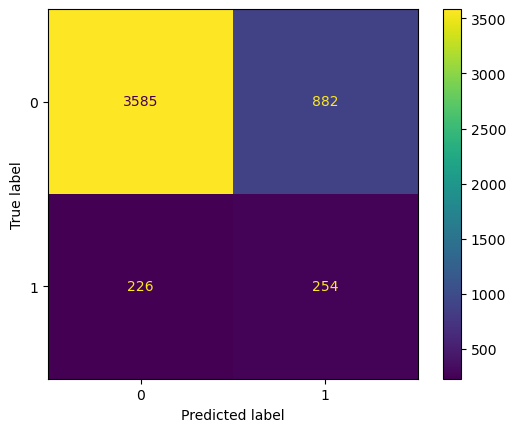

In [155]:
cm = confusion_matrix(y, clf_NB.predict(X))

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=clf_NB.classes_)
disp.plot()
plt.show()

In [156]:
target_names = ['class 0', 'class 1']
print(classification_report(y, clf_NB.predict(X), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.80      0.87      4467
     class 1       0.22      0.53      0.31       480

    accuracy                           0.78      4947
   macro avg       0.58      0.67      0.59      4947
weighted avg       0.87      0.78      0.81      4947



In [157]:
X_train = df2.drop("Personal_Loan", axis=1)
y_train = df2["Personal_Loan"]
X_test = df_sample.drop("Personal_Loan", axis=1)

In [158]:
clf_NB.fit(X_train, y_train)
y_pred_2 = clf_NB.predict(X_test)

In [159]:
print(y_pred_2)

[0]


<div style="font-family:B Nazanin; font-size:30px; color:#33FF8A; line-height: 130%">
KNN Algorithm (Case 2)

In [160]:
X = df2.drop("Personal_Loan", axis=1).values
y = df2["Personal_Loan"]#.values.reshape(-1, 1)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [162]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

In [163]:
K = 20
Acc = np.zeros(K)
print("Acc", Acc)

for i in range(1, K+1):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_scaling, y_train.ravel())
    y_pred = clf.predict(X_test_scaling)
    Acc[i-1] = metrics.f1_score(y_test, y_pred)
    
Acc

Acc [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([0.77777778, 0.62195122, 0.71038251, 0.65060241, 0.70857143,
       0.6125    , 0.67065868, 0.62111801, 0.67857143, 0.62111801,
       0.65454545, 0.6125    , 0.63803681, 0.59493671, 0.61349693,
       0.56050955, 0.60493827, 0.58227848, 0.60869565, 0.59119497])

In [164]:
print(np.max(Acc))
print(np.min(Acc))

0.7777777777777777
0.5605095541401275


<div style=" font-size:22px; line_height:160%">
Finding the appropriate k for recall score

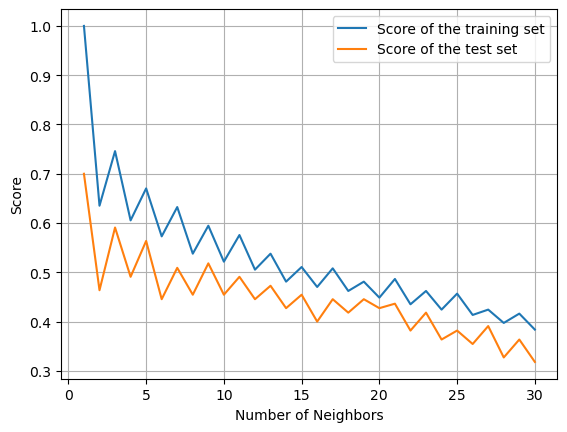

In [165]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaling, y_train.ravel())
    y_train_new = knn.predict(X_train_scaling)
    y_test_new = knn.predict(X_test_scaling)
    training_acc.append(metrics.recall_score(y_train, y_train_new))
    test_acc.append(metrics.recall_score(y_test, y_test_new))
    
plt.plot(neighbors_settings, training_acc, label="Score of the training set")
plt.plot(neighbors_settings, test_acc, label="Score of the test set")
plt.ylabel("Score")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.legend()

In [166]:
parameters = {"n_neighbors": range(1, 31)}
grid_kn = GridSearchCV(estimator=knn,  # Model
                      param_grid=parameters,  # Range of k
                      scoring="recall",  #Strategy to evaluate the performance
                      #of the cross-validated model on the test set
                      cv=5,  #cross-validation generator
                      verbose=1,  #Time to calculate
                      n_jobs=-1)  #Help to CPU

grid_kn.fit(X_train_scaling, y_train.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='recall',
             verbose=1)

In [167]:
grid_kn.best_params_

{'n_neighbors': 1}

In [168]:
K = 1
clf = KNeighborsClassifier(K)
clf.fit(X_train_scaling, y_train.ravel())
y_pred_KNN = clf.predict(X_test_scaling)

In [169]:
f1_score_KNN_2_recall = metrics.f1_score(y_test, y_pred_KNN)
print("Score (knn_2_recall):", f1_score_KNN_2_recall)

Score (knn_2_recall): 0.7777777777777777


In [170]:
X_train = df2.drop("Personal_Loan", axis=1).values
y_train = df2["Personal_Loan"]
X_test = df_sample.drop("Personal_Loan", axis=1).values

In [171]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

In [172]:
clf.fit(X_train_scaling, y_train)
y_pred_3_1 = clf.predict(X_test_scaling)

In [173]:
print(y_pred_3_1)

[0]


<div style=" font-size:22px; line_height:160%">
Finding the right k for precision

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [175]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

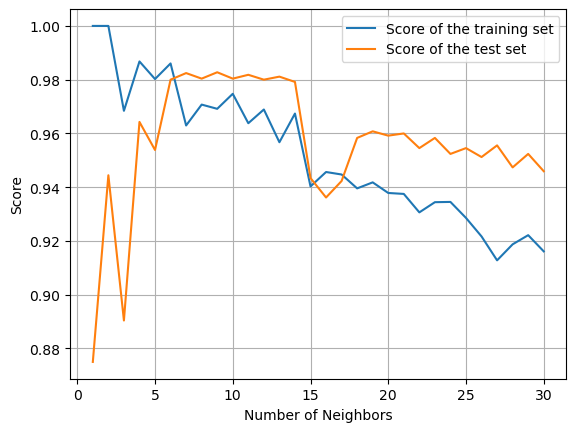

In [176]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaling, y_train.ravel())
    y_train_new = knn.predict(X_train_scaling)
    y_test_new = knn.predict(X_test_scaling)
    training_acc.append(metrics.precision_score(y_train, y_train_new))
    test_acc.append(metrics.precision_score(y_test, y_test_new))
    
plt.plot(neighbors_settings, training_acc, label="Score of the training set")
plt.plot(neighbors_settings, test_acc, label="Score of the test set")
plt.ylabel("Score")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.legend()

In [177]:
parameters = {"n_neighbors": range(1, 31)}
grid_kn = GridSearchCV(estimator=knn,  # Model
                      param_grid=parameters,  # Range of k
                      scoring="precision",  #Strategy to evaluate the performance
                      #of the cross-validated model on the test set
                      cv=5,  #cross-validation generator
                      verbose=1,  #Time to calculate
                      n_jobs=-1)  #Help to CPU

grid_kn.fit(X_train_scaling, y_train.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='precision',
             verbose=1)

In [178]:
grid_kn.best_params_

{'n_neighbors': 4}

In [179]:
K = 4
clf = KNeighborsClassifier(K)
clf.fit(X_train_scaling, y_train.ravel())
y_pred_KNN = clf.predict(X_test_scaling)

In [180]:
f1_score_KNN_2_precision = metrics.f1_score(y_test, y_pred_KNN)
print("Score (knn_2_precision):", f1_score_KNN_2_precision)

Score (knn_2_precision): 0.6506024096385543


In [181]:
X_train = df2.drop("Personal_Loan", axis=1).values
y_train = df2["Personal_Loan"]
X_test = df_sample.drop("Personal_Loan", axis=1).values

In [182]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

In [183]:
clf.fit(X_train_scaling, y_train)
y_pred_3_2 = clf.predict(X_test_scaling)

In [184]:
print(y_pred_3_2)

[0]


<div style=" font-size:22px; line_height:160%">
Find the appropriate k for the score of f1

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [186]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

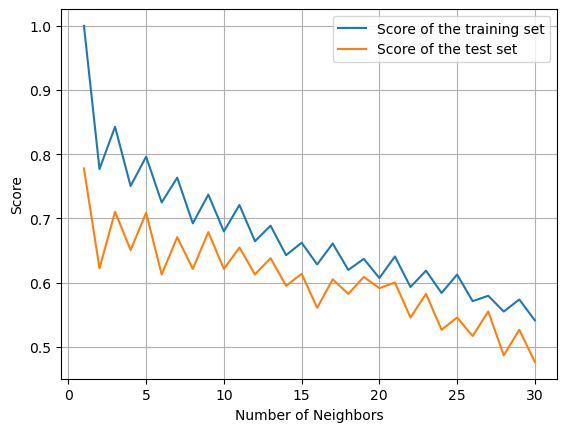

In [187]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaling, y_train.ravel())
    y_train_new = knn.predict(X_train_scaling)
    y_test_new = knn.predict(X_test_scaling)
    training_acc.append(metrics.f1_score(y_train, y_train_new))
    test_acc.append(metrics.f1_score(y_test, y_test_new))
    
plt.plot(neighbors_settings, training_acc, label="Score of the training set")
plt.plot(neighbors_settings, test_acc, label="Score of the test set")
plt.ylabel("Score")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.legend()

In [188]:
parameters = {"n_neighbors": range(1, 31)}
grid_kn = GridSearchCV(estimator=knn,  # Model
                      param_grid=parameters,  # Range of k
                      scoring="f1",  #Strategy to evaluate the performance
                      #of the cross-validated model on the test set
                      cv=5,  #cross-validation generator
                      verbose=1,  #Time to calculate
                      n_jobs=-1)  #Help to CPU

grid_kn.fit(X_train_scaling, y_train.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='f1', verbose=1)

In [189]:
grid_kn.best_params_

{'n_neighbors': 1}

In [190]:
K = 1
clf = KNeighborsClassifier(K)
clf.fit(X_train_scaling, y_train.ravel())
y_pred_KNN = clf.predict(X_test_scaling)

In [191]:
f1_score_KNN_2_f1 = metrics.f1_score(y_test, y_pred_KNN)
print("Score (knn_2_f1):", f1_score_KNN_2_f1)

Score (knn_2_f1): 0.7777777777777777


In [192]:
X_train = df2.drop("Personal_Loan", axis=1).values
y_train = df2["Personal_Loan"]
X_test = df_sample.drop("Personal_Loan", axis=1).values

In [193]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

In [194]:
clf.fit(X_train_scaling, y_train)
y_pred_3_3 = clf.predict(X_test_scaling)

In [195]:
print(y_pred_3_3)

[0]


<div style="font-size:30px; color:#33FF8A; line-height: 130%">
CASE 3:<br/>
the "Experience" column -> eliminate the column due to high correlation with "Age" column

In [196]:
df3 = df.drop("Experience", axis=1)
df3

Age  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0      25      49     91107       4    1.6          1         0   
1      45      34     90089       3    1.5          1         0   
2      39      11     94720       1    1.0          1         0   
3      35     100     94112       1    2.7          2         0   
4      35      45     91330       4    1.0          2         0   
...   ...     ...       ...     ...    ...        ...       ...   
4995   29      40     92697       1    1.9          3         0   
4996   30      15     92037       4    0.4          1        85   
4997   63      24     93023       2    0.3          3         0   
4998   65      49     90034       3    0.5          2         0   
4999   28      83     92612       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[4999 rows x 12 columns]

In [197]:
X = df3.drop("Personal_Loan", axis=1)
y = df3["Personal_Loan"]#.values.reshape(-1, 1)

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<div style="font-family:B Nazanin; font-size:30px; color:#33FF8A; line-height: 130%">
Logistic Regression (Case 3)

In [199]:
logistic_reg = LogisticRegression(solver="liblinear")

In [200]:
logistic_reg.fit(X_train, y_train)
y_pred_lg = logistic_reg.predict(X_test)

In [201]:
y_pred_lg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [202]:
f1_score_lg_3 = metrics.f1_score(y_test, y_pred_lg)
print("Score (lg_3):", f1_score_lg_3)

Score (lg_3): 0.4155844155844156


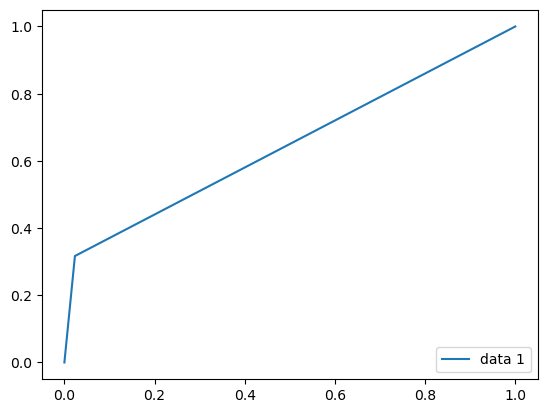

In [203]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_lg)
plt.plot(fpr, tpr, label="data 1")
plt.legend(loc=4)
plt.show()

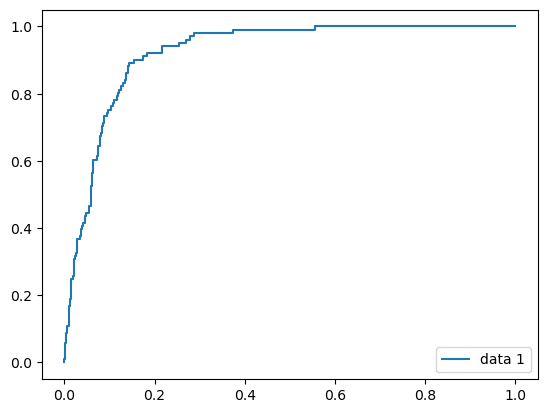

In [204]:
y_pred_proba_lg = logistic_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_lg)
plt.plot(fpr, tpr, label="data 1")
plt.legend(loc=4)
plt.show()

In [205]:
Counter(logistic_reg.predict(X))

Counter({0: 4725, 1: 274})

In [206]:
confusion_matrix(y, logistic_reg.predict(X))

array([[4393,  126],
       [ 332,  148]], dtype=int64)

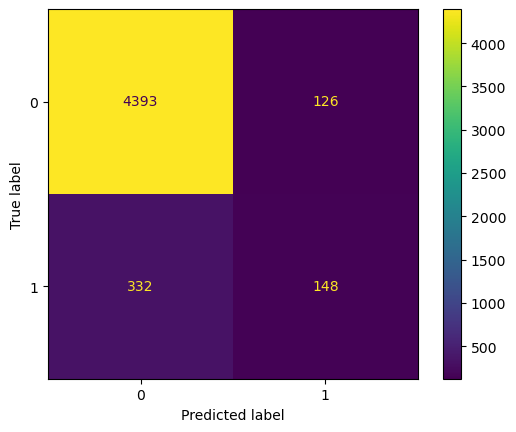

In [207]:
cm = confusion_matrix(y, logistic_reg.predict(X))

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

In [208]:
target_names = ['class 0', 'class 1']
print(classification_report(y, logistic_reg.predict(X), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.97      0.95      4519
     class 1       0.54      0.31      0.39       480

    accuracy                           0.91      4999
   macro avg       0.73      0.64      0.67      4999
weighted avg       0.89      0.91      0.90      4999



In [209]:
# Cross Validation

In [210]:
for i in range(5, 11):
    kfold_validation = KFold(i, shuffle=True, random_state=0)
    results = cross_val_score(logistic_reg, X, y, cv=kfold_validation)
    print(f"For KFold = {i}:")
    print(f"{results}\n")

For KFold = 5:
[0.91       0.913      0.901      0.904      0.91091091]

For KFold = 6:
[0.90647482 0.90996399 0.9027611  0.90636255 0.90636255 0.91356543]

For KFold = 7:
[0.9020979  0.91036415 0.90896359 0.90196078 0.91316527 0.89915966
 0.91876751]

For KFold = 8:
[0.9056     0.9088     0.9216     0.8944     0.912      0.9168
 0.8864     0.92147436]

For KFold = 9:
[0.9028777  0.91007194 0.9118705  0.89568345 0.90990991 0.9027027
 0.92792793 0.89009009 0.91531532]

For KFold = 10:
[0.9        0.92       0.9        0.924      0.902      0.906
 0.914      0.896      0.912      0.91382766]



<div style=" font-size:22px; line_height:160%">
The result of cross validation shows that in the dataset, we do not have data that have a significant negative effect on score.

In [211]:
df_sample = pd.DataFrame({
    "Age": [42],
#     "Experience": [16],
    "Income": [30],
    "ZIP_Code": [92037],
    "Family": [3],
    "CCAvg": [1.2],
    "Education": [3.0],
    "Mortgage": [0],
    "Securities_Account": [1],
    "CD_Account": [0],
    "Online": [1],
    "CreditCard": [1],
    "Personal_Loan": [1],
#     "ID": [5071]
})

In [212]:
Df = pd.concat([df3, df_sample])
df_sample = Df.iloc[Df.shape[0]-1:]

df_sample

Age  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   42      30     92037       3    1.2        3.0         0              1   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       1           1

In [213]:
X_train = df3.drop("Personal_Loan", axis=1)
y_train = df3["Personal_Loan"]#.values.reshape(-1, 1)
X_test = df_sample.drop("Personal_Loan", axis=1)

In [214]:
logistic_reg.fit(X_train, y_train)
y_pred_1 = logistic_reg.predict(X_test)

In [215]:
print(y_pred_1)

[0]


<div style="font-family:B Nazanin; font-size:30px; color:#33FF8A; line-height: 130%">
ComplementNB (Case 3)

In [216]:
Counter(y)

Counter({0: 4519, 1: 480})

<div style=" font-size:22px; line_height:160%">
This indicates that the target data is imbalanced. Because the number of data 0 is much more than the number of data 1.<br/>
As a result, we use Naive Bayes Compliment.<br/>
Also, for this reason, the accuracy metric is not a good measure and we should consider other metrics or the confusion matrix.

In [217]:
X = df3.drop("Personal_Loan", axis=1)
y = df3["Personal_Loan"]#.values.reshape(-1, 1)

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [219]:
clf_NB = ComplementNB()

In [220]:
clf_NB.fit(X_train, y_train)

ComplementNB()

In [221]:
y_pred_NB = clf_NB.predict(X_test)

In [222]:
print(y_pred_NB)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 

In [223]:
f1_score_NB_3 = metrics.f1_score(y_test, y_pred_NB)
print("Score (NB_3):", f1_score_NB_3)

Score (NB_3): 0.3323442136498516


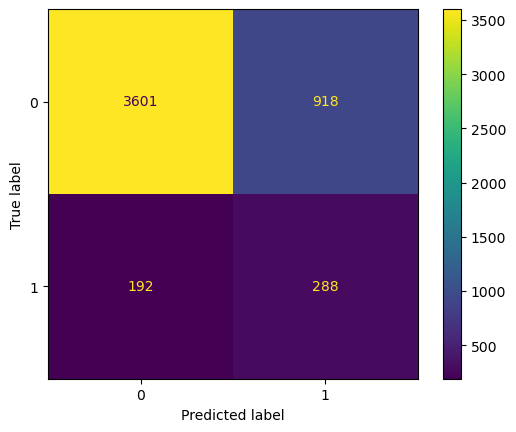

In [224]:
cm = confusion_matrix(y, clf_NB.predict(X))

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=clf.classes_)
disp.plot()
plt.show()

In [225]:
target_names = ['class 0', 'class 1']
print(classification_report(y, clf_NB.predict(X), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.80      0.87      4519
     class 1       0.24      0.60      0.34       480

    accuracy                           0.78      4999
   macro avg       0.59      0.70      0.60      4999
weighted avg       0.88      0.78      0.82      4999



In [226]:
X_train = df3.drop("Personal_Loan", axis=1)
y_train = df3["Personal_Loan"]#.values.reshape(-1, 1)
X_test = df_sample.drop("Personal_Loan", axis=1)

In [227]:
clf_NB.fit(X_train, y_train)
y_pred_2 = clf_NB.predict(X_test)

In [228]:
print(y_pred_2)

[0]


<div style="font-family:B Nazanin; font-size:30px; color:#33FF8A; line-height: 130%">
KNN Algorithm (Case 3)

In [229]:
X = df3.drop("Personal_Loan", axis=1).values
y = df3["Personal_Loan"]#.values.reshape(-1, 1)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [231]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

In [232]:
K = 20
Acc = np.zeros(K)
print("Acc", Acc)

for i in range(1, K+1):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_scaling, y_train.ravel())
    y_pred = clf.predict(X_test_scaling)
    Acc[i-1] = metrics.f1_score(y_test, y_pred)
    
Acc

Acc [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([0.73988439, 0.63576159, 0.6993865 , 0.62162162, 0.68789809,
       0.56338028, 0.63087248, 0.59310345, 0.65789474, 0.57342657,
       0.62162162, 0.54285714, 0.57342657, 0.55714286, 0.59722222,
       0.54676259, 0.57746479, 0.52554745, 0.54676259, 0.49253731])

In [233]:
print(np.max(Acc))
print(np.min(Acc))

0.7398843930635838
0.4925373134328358


<div style=" font-size:22px; line_height:160%">
Finding the appropriate k for recall score

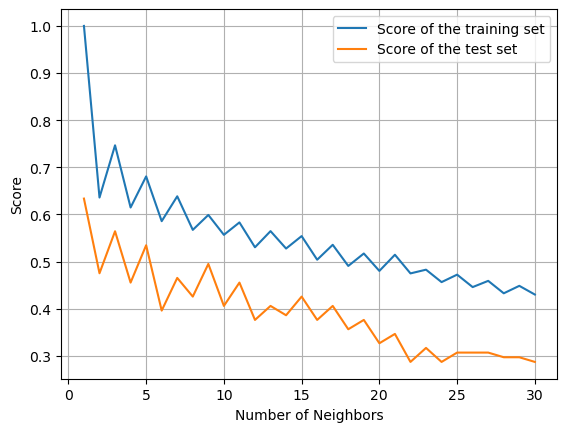

In [234]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaling, y_train.ravel())
    y_train_new = knn.predict(X_train_scaling)
    y_test_new = knn.predict(X_test_scaling)
    training_acc.append(metrics.recall_score(y_train, y_train_new))
    test_acc.append(metrics.recall_score(y_test, y_test_new))
    
plt.plot(neighbors_settings, training_acc, label="Score of the training set")
plt.plot(neighbors_settings, test_acc, label="Score of the test set")
plt.ylabel("Score")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.legend()

In [235]:
parameters = {"n_neighbors": range(1, 31)}
grid_kn = GridSearchCV(estimator=knn,  # Model
                      param_grid=parameters,  # Range of k
                      scoring="recall",  #Strategy to evaluate the performance
                      #of the cross-validated model on the test set
                      cv=5,  #cross-validation generator
                      verbose=1,  #Time to calculate
                      n_jobs=-1)  #Help to CPU

grid_kn.fit(X_train_scaling, y_train.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='recall',
             verbose=1)

In [236]:
grid_kn.best_params_

{'n_neighbors': 1}

In [237]:
K = 1
clf = KNeighborsClassifier(K)
clf.fit(X_train_scaling, y_train.ravel())
y_pred_KNN = clf.predict(X_test_scaling)

In [238]:
f1_score_KNN_3_recall = metrics.f1_score(y_test, y_pred_KNN)
print("Score (knn_3_recall):", f1_score_KNN_3_recall)

Score (knn_3_recall): 0.7398843930635838


In [239]:
X_train = df3.drop("Personal_Loan", axis=1).values
y_train = df3["Personal_Loan"]#.values.reshape(-1, 1)
X_test = df_sample.drop("Personal_Loan", axis=1).values

In [240]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

In [241]:
clf.fit(X_train_scaling, y_train)
y_pred_3_1 = clf.predict(X_test_scaling)

In [242]:
print(y_pred_3_1)

[0]


<div style=" font-size:22px; line_height:160%">
Finding the right k for precision

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [244]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

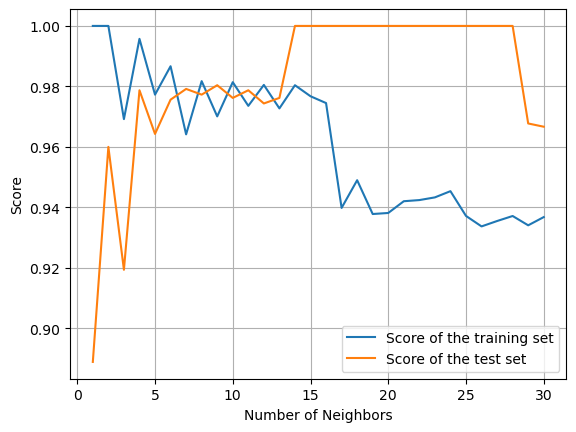

In [245]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaling, y_train.ravel())
    y_train_new = knn.predict(X_train_scaling)
    y_test_new = knn.predict(X_test_scaling)
    training_acc.append(metrics.precision_score(y_train, y_train_new))
    test_acc.append(metrics.precision_score(y_test, y_test_new))
    
plt.plot(neighbors_settings, training_acc, label="Score of the training set")
plt.plot(neighbors_settings, test_acc, label="Score of the test set")
plt.ylabel("Score")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.legend()

In [246]:
parameters = {"n_neighbors": range(1, 31)}
grid_kn = GridSearchCV(estimator=knn,  # Model
                      param_grid=parameters,  # Range of k
                      scoring="precision",  #Strategy to evaluate the performance
                      #of the cross-validated model on the test set
                      cv=5,  #cross-validation generator
                      verbose=1,  #Time to calculate
                      n_jobs=-1)  #Help to CPU

grid_kn.fit(X_train_scaling, y_train.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='precision',
             verbose=1)

In [247]:
grid_kn.best_params_

{'n_neighbors': 4}

In [248]:
K = 4
clf = KNeighborsClassifier(K)
clf.fit(X_train_scaling, y_train.ravel())
y_pred_KNN = clf.predict(X_test_scaling)

In [249]:
f1_score_KNN_3_precision = metrics.f1_score(y_test, y_pred_KNN)
print("Score (knn_3_precision):", f1_score_KNN_3_precision)

Score (knn_3_precision): 0.6216216216216216


In [250]:
X_train = df3.drop("Personal_Loan", axis=1).values
y_train = df3["Personal_Loan"]#.values.reshape(-1, 1)
X_test = df_sample.drop("Personal_Loan", axis=1).values

In [251]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

In [252]:
clf.fit(X_train_scaling, y_train)
y_pred_3_2 = clf.predict(X_test_scaling)

In [253]:
print(y_pred_3_2)

[0]


<div style=" font-size:22px; line_height:160%">
Find the appropriate k for the score of f1

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [255]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

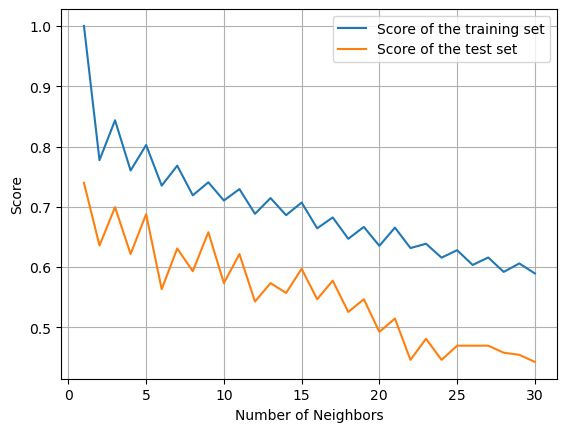

In [256]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaling, y_train.ravel())
    y_train_new = knn.predict(X_train_scaling)
    y_test_new = knn.predict(X_test_scaling)
    training_acc.append(metrics.f1_score(y_train, y_train_new))
    test_acc.append(metrics.f1_score(y_test, y_test_new))
    
plt.plot(neighbors_settings, training_acc, label="Score of the training set")
plt.plot(neighbors_settings, test_acc, label="Score of the test set")
plt.ylabel("Score")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.legend()

In [257]:
parameters = {"n_neighbors": range(1, 31)}
grid_kn = GridSearchCV(estimator=knn,  # Model
                      param_grid=parameters,  # Range of k
                      scoring="f1",  #Strategy to evaluate the performance
                      #of the cross-validated model on the test set
                      cv=5,  #cross-validation generator
                      verbose=1,  #Time to calculate
                      n_jobs=-1)  #Help to CPU

grid_kn.fit(X_train_scaling, y_train.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='f1', verbose=1)

In [258]:
grid_kn.best_params_

{'n_neighbors': 3}

In [259]:
K = 3
clf = KNeighborsClassifier(K)
clf.fit(X_train_scaling, y_train.ravel())
y_pred_KNN = clf.predict(X_test_scaling)

In [260]:
f1_score_KNN_3_f1 = metrics.f1_score(y_test, y_pred_KNN)
print("Score (knn_3_f1):", f1_score_KNN_3_f1)

Score (knn_3_f1): 0.6993865030674846


In [261]:
X_train = df3.drop("Personal_Loan", axis=1).values
y_train = df3["Personal_Loan"]#.values.reshape(-1, 1)
X_test = df_sample.drop("Personal_Loan", axis=1).values

In [262]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

In [263]:
clf.fit(X_train_scaling, y_train)
y_pred_3_3 = clf.predict(X_test_scaling)

In [264]:
print(y_pred_3_3)

[0]


<div style=" font-size:22px; line_height:160%">
Conclusions:

<div style=" font-size:22px; line_height:160%">
Reminder:<br/>
Mode number 1: We set the negative values of the experience to zero.<br/>
Mode number 2: We removed negative experience values (about <a href="#inja" >1.04%</a> of all samples in the dataframe).<br/>
Case number 3: We completely removed the experience column (feature) from the dataset due to high correlation with age.

In [265]:
print("Score (lg_1):", f1_score_lg_1)
print("Score (lg_2):", f1_score_lg_2)
print("Score (lg_3):", f1_score_lg_3)

Score (lg_1): 0.4052287581699347
Score (lg_2): 0.42622950819672134
Score (lg_3): 0.4155844155844156


In [266]:
print("Score (NB_1):", f1_score_NB_1)
print("Score (NB_2):", f1_score_NB_2)
print("Score (NB_3):", f1_score_NB_3)

Score (NB_1): 0.33727810650887574
Score (NB_2): 0.3363914373088685
Score (NB_3): 0.3323442136498516


In [267]:
print("Score (knn_1_recall):", f1_score_KNN_1_recall)
print("Score (knn_2_recall):", f1_score_KNN_2_recall)
print("Score (knn_3_recall):", f1_score_KNN_3_recall)

Score (knn_1_recall): 0.7218934911242604
Score (knn_2_recall): 0.7777777777777777
Score (knn_3_recall): 0.7398843930635838


In [268]:
print("Score (knn_1_precision):", f1_score_KNN_1_precision)
print("Score (knn_2_precision):", f1_score_KNN_2_precision)
print("Score (knn_3_precision):", f1_score_KNN_3_precision)

Score (knn_1_precision): 0.5531914893617021
Score (knn_2_precision): 0.6506024096385543
Score (knn_3_precision): 0.6216216216216216


In [269]:
print("Score (knn_1_f1):", f1_score_KNN_1_f1)
print("Score (knn_2_f1):", f1_score_KNN_2_f1)
print("Score (knn_3_f1):", f1_score_KNN_3_f1)

Score (knn_1_f1): 0.6666666666666666
Score (knn_2_f1): 0.7777777777777777
Score (knn_3_f1): 0.6993865030674846


<div style=" font-size:22px; line_height:160%">
According to the above values, it can be said that:<br/>
- In general, removing the "experience" feature gives more accuracy to the models.<br/>
- The Naive Bayes model does not have good accuracy on this dataset (of course, it should be noted that only the complementNB model was used among the Naive Biz models, because this model is used for <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB" target="_blank">imbalanced</a> targets.<br/>
- KNN models are more accurate than logistic regression models.

In [270]:
df3

Age  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0      25      49     91107       4    1.6          1         0   
1      45      34     90089       3    1.5          1         0   
2      39      11     94720       1    1.0          1         0   
3      35     100     94112       1    2.7          2         0   
4      35      45     91330       4    1.0          2         0   
...   ...     ...       ...     ...    ...        ...       ...   
4995   29      40     92697       1    1.9          3         0   
4996   30      15     92037       4    0.4          1        85   
4997   63      24     93023       2    0.3          3         0   
4998   65      49     90034       3    0.5          2         0   
4999   28      83     92612       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[4999 rows x 12 columns]

In [291]:
X = df3.drop("Personal_Loan", axis=1).values
y = df3.Personal_Loan.values.reshape(-1, 1)

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [293]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [278]:
parameters = {"max_depth": range(1, 20), 
              "splitter": ["best", "random"]
             }

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
grid_dt = GridSearchCV(estimator=dt,  # Model
                      param_grid=parameters,
                      scoring="accuracy",  # Strategy to evaluate the performance of the cross-validated model on the test set
                                           # if it is a multiclass target, use f1_micro
                                           # f1 or roc_auc doesn't work with multiclass targets
                                           # f1_micro and accuracy were OK here.
                      cv=cv ,  #cross-validation generator
                      verbose=1,  #Time to calculate
                      n_jobs=-1)  #Help to CPU

grid_dt.fit(X_train, y_train.ravel())

Fitting 10 folds for each of 38 candidates, totalling 380 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [279]:
grid_dt.best_params_

{'max_depth': 6, 'splitter': 'best'}

In [294]:
dt = DecisionTreeClassifier(max_depth=6, 
                            splitter='best', 
                            random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [295]:
f1_score_dt_3_f1 = metrics.f1_score(y_test, y_pred)
print("Score (dt_3_f1):", f1_score_dt_3_f1)

Score (dt_3_f1): 0.9326424870466321


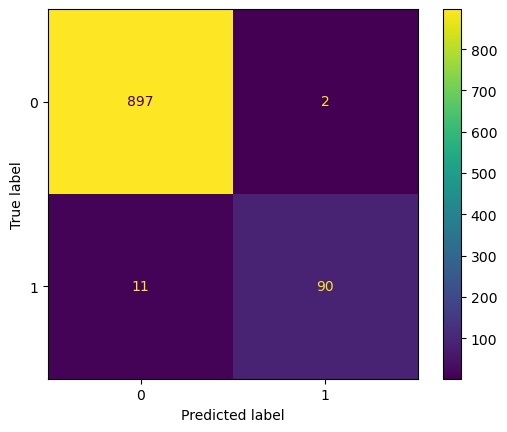

In [281]:
cm = confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

In [296]:
target_names = ["class '0'", "class '1'"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   class '0'       0.99      1.00      0.99       899
   class '1'       0.98      0.89      0.93       101

    accuracy                           0.99      1000
   macro avg       0.98      0.94      0.96      1000
weighted avg       0.99      0.99      0.99      1000



In [283]:
df_sample = pd.DataFrame({
    "Age": [42],
#     "Experience": [16],
    "Income": [30],
    "ZIP_Code": [92037],
    "Family": [3],
    "CCAvg": [1.2],
    "Education": [3.0],
    "Mortgage": [0],
    "Securities_Account": [1],
    "CD_Account": [0],
    "Online": [1],
    "CreditCard": [1],
    "Personal_Loan": [1],
#     "ID": [5071]
})

In [284]:
Df = pd.concat([df3, df_sample])
df_sample = Df.iloc[Df.shape[0]-1:]

df_sample

Age  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   42      30     92037       3    1.2        3.0         0              1   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       1           1

In [300]:
X_train = df3.drop("Personal_Loan", axis=1).values
y_train = df3["Personal_Loan"].values.reshape(-1, 1)
X_test = df_sample.drop("Personal_Loan", axis=1)

In [301]:
dt.fit(X_train, y_train)
y_pred_1 = dt.predict(X_test)

In [302]:
print(y_pred_1)

[0]


<div style=" font-size:22px; line_height:160%">
As you can see, the accuracy of the tree model on imbalanced data is above 90%, while the accuracy of Logistic Regression, Naive Bayes, and KNN models is from 30% to 70%.

<div dir="rtl" style="font-family:B Nazanin; font-size:22px; color:#33FF8A; line-height: 130%">
